<font size = 5><b><center>Trader Influencers Stream </font>
<ul>
<font size = 3>
<a href = "#section1"><li>1. Simple EDAs</li></a>
    <a href = "#section1.1"><ul><li>1.1 General Information of the dataset</li></ul></a>
    <a href = "#section1.2"><ul><li>1.2 Twitter Accounts' Information</li></ul></a>
    <a href = "#section1.3"><ul><li>1.3 Time series of tweet/retweet</li></ul></a>
<a href = "#section2"><li>2. Preprocessing the Dataset</li></a>
    <a href = "#section2.1"><ul><li>2.1 Consistent None types</li></ul></a>
    <a href = "#section2.2"><ul><li>2.2 Drop Unnecessary Columns</li></ul></a>
    <a href = "#section2.3"><ul><li>2.3 Extract all hashtags, symbols and user_mentions</li></ul></a>
    <a href = "#section2.4"><ul><li>2.4  Clean text for modeling</li></ul></a>
<a href = "#section3"><li>3. WordCloud</li></a>
    <a href = "#section3.1"><ul><li>3.1 Hashtag</li></ul></a>
    <a href = "#section3.2"><ul><li>3.2 Symbol</li></ul></a>
    <a href = "#section3.3"><ul><li>3.3 Hashtag and Symbol together</li></ul></a>
    <a href = "#section3.4"><ul><li>3.4 Clean text</li></ul></a>
<a href = "#section4"><li>4 Sentiment analysis</li></a>
    <a href = "#section4.1"><ul><li>4.1 Vader</li></ul></a>
    <a href = "#section4.2"><ul><li>4.2 Textblob</li></ul></a>
    <a href = "#section4.3"><ul><li>4.3 Flair</li></ul></a>
    <a href = "#section4.4"><ul><li>4.4 Sentiment packages comparison, distribution, and correlation </li></ul></a>
    <a href = "#section4.5"><ul><li>4.5 Time series of sentiment</li></ul></a>
<a href = "#section5"><li> 5. LDA</li></a>
    <a href = "#section5.0"><ul><li>5.0 Lemmatization and ngrams(freq) - prepare the data for modeling</li></ul></a>
    <a href = "#section5.1"><ul><li>5.1 A Base Gensim LDA Mode</li></ul></a>
    <a href = "#section5.2"><ul><li>5.2 Gensim LDA Tuning</li></ul></a>
    <a href = "#section5.3"><ul><li>5.3 Gensim Results</li></ul></a>
        <a href = "#section5.3.1"><ul><ul><li>5.3.1 Visualization</li></ul></ul></a>
        <a href = "#section5.3.2"><ul><ul><li>5.3.2 topic keywords importance</li></ul></ul></a>
        <a href = "#section5.3.3"><ul><ul><li>5.3.3 Make hard topic assignments for each tweet</li></ul></ul></a> 
    <a href = "#section5.4"><ul><li>5.4 Sentiment of topic groups</li></ul></a>
        <a href = "#section5.4.1"><ul><ul><li>5.4.1 Time series of top five topic group</li></ul></ul></a>
        <a href = "#section5.4.2"><ul><ul><li>5.4.2 Averaged sentiment for each topic group</li></ul></ul></a>
<a href = "#section6"><li> 6. BERT</li></a>
    <a href = "#section6.1"><ul><li>6.1 Results</li></ul></a>
<a href = "#section7"><li> 7. Affect Analysis (extra)</li></a>
    
</font>   
</ul>

<font color='##4682B4' size = 3>Pool dataset into jupyter notebook from Google SQL, credential file is named macrox.json. <br>
    All seven streams are included in the tables list, this file will focus on Trader Influencers dataset only </font>

In [1]:
#pip install gcsfs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

import re,string #deal with special characteristics in hashtag and text

import datetime
from timeit import default_timer as timer
from time import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'macrox.json'

tables = ['twitter_stream_macro_institutions',
 'twitter_stream_econ_news',
 'twitter_stream_investment_communities',
 'twitter_stream_us_politicians',
 'twitter_stream_federal_reserve',
 'twitter_stream_india_covid',
 'twitter_stream_trader_influencers']

In [3]:
df = pd.read_csv('gs://capstone_twitter/capstone/' + tables[4] + '.csv', index_col= 0)

<font size = 5><b><center><a id="section1">1. Simple EDAs</a>

<font color='#008080' size = 4><b><center><a id="section1.1">1.1 General Information</a>

In [4]:
df.tail()

status_id           created_at user_screen_name  \
137012  1432401128541593611  2021-08-30 17:53:36          Cstwest   
137013  1432401261245181962  2021-08-30 17:54:08       WillyP2020   
137014  1432401380203970561  2021-08-30 17:54:36   GEMstockfinder   
137015  1432401388420493313  2021-08-30 17:54:38        Ca5per_15   
137016  1432401447983980544  2021-08-30 17:54:52       bullsclaws   

                    user_id  followers            location coordinates  \
137012   914497372943724544          7                 USA        None   
137013  1254568218959777792         79                None        None   
137014   869694302460538882        239       New York, USA        None   
137015  1389559840154939393         44  Portofino, Liguria        None   
137016           1317301598        109                 PNW        None   

        is_retweet  retweet_count  \
137012       False              0   
137013       False              0   
137014       False              0   
137015       False              0   
137016       False              0   

                                                     text            topic  \
137012  @federalreserve Dear Jay. On behalf of all my ...  Federal-Reserve   
137013  @qp_cody @unusual_whales @federalreserve pleas...  Federal-Reserve   
137014  @unusual_whales @federalreserve @neelkashkari ...  Federal-Reserve   
137015  @bigkid23 @unusual_whales @federalreserve We a...  Federal-Reserve   
137016  @unusual_whales @federalreserve The borrows ar...  Federal-Reserve   

       hashtags symbols                                      user_mentions  \
137012     None    None  [{"screen_name": "federalreserve", "name": "Fe...   
137013     None    None  [{"screen_name": "qp_cody", "name": "CodyCalls...   
137014     None    None  [{"screen_name": "unusual_whales", "name": "un...   
137015     None    None  [{"screen_name": "bigkid23", "name": "McLovin"...   
137016     None    None  [{"screen_name": "unusual_whales", "name": "un...   

                                                     urls  
137012  [{"url": "https://t.co/jJerUR3UCu", "expanded_...  
137013                                               None  
137014                                               None  
137015  [{"url": "https://t.co/2jjxZWwNZe", "expanded_...  
137016                                               None

In [5]:
df.text[4]

'How long can they keep doing this. We’re imploding as a nation.'

In [6]:
df.user_mentions[4]

'None'

In [7]:
## total number of tweets in this dataset\
print("There are totally " + str(len(df)) + " Tweets in this dataset")


There are totally 137017 Tweets in this dataset


<font color='##4682B4' size = 3>See when twitter are sent in this dataset</font>

In [8]:
def time_frame(df_name):
    df_name_copy = df_name
    df_name_copy['created_at'] = df_name_copy['created_at'].astype('datetime64[ns]')

    print("\nLatest date of dataset:")
    print(df_name_copy.created_at.max())

    print("\nEarliest date of dataset:")
    print(df_name_copy.created_at.min())

    print("\nNumber of days between Latest and Earliest date of dataset:")
    print((df_name_copy.created_at.max() - df_name_copy.created_at.min()).days)

In [9]:
# time of when those tweets are being created
time_frame(df)


Latest date of dataset:
2021-10-05 18:20:36

Earliest date of dataset:
2021-06-12 14:38:35

Number of days between Latest and Earliest date of dataset:
115


<font color='#008080' size = 4><b><center><a id="section1.2">1.2 Accounts Information</a>

In [10]:
print("There are totally " + str(len(list(df['user_id'].unique()))) + " accounts in this dataset")

There are totally 46878 accounts in this dataset


In [11]:
df['tweets_Count'] = [1]* len(df)

In [12]:
df_f1 = df.groupby(['user_screen_name']).mean()

In [13]:
df_f2 = df.groupby(['user_screen_name']).sum()
df_f2 = df_f2.reset_index()

In [14]:
del df_f2['followers']

In [15]:
df_f2 = pd.merge(df_f2, df_f1['followers'], on = ['user_screen_name'])

In [16]:
def Account_info(df_f2, feature):
    df_f2.set_index(feature, inplace=True)
    df_f2.sort_index(inplace=True, ascending=False)
    df_f2.reset_index(feature, inplace=True)
    return df_f2[['user_screen_name','followers', 'retweet_count', 'tweets_Count']][:10]

<font color='##4682B4' size = 3>Top 10 accounts that have the most followers</font>

In [17]:
Account_info(df_f2, 'followers')

user_screen_name     followers  retweet_count  tweets_Count
0        SenWarren  6.943660e+06            0.0           2.0
1      paulkrugman  4.614122e+06            0.0           1.0
2    EconomicTimes  3.986440e+06            5.0          20.0
3          Bitcoin  2.973506e+06            0.0           2.0
4            cspan  2.088140e+06           22.0          12.0
5         CoinDesk  1.956237e+06            0.0          16.0
6          IMFNews  1.866682e+06            0.0           1.0
7     DineshDSouza  1.812911e+06            0.0           1.0
8    BoredElonMusk  1.753497e+06            0.0           1.0
9            BTCTN  1.592479e+06          165.0          18.0

<font color='##4682B4' size = 3>Top 10 accounts that have the most Retweets</font>

In [18]:
Account_info(df_f2, 'retweet_count')

user_screen_name      followers  retweet_count  tweets_Count
0         elerianm  402617.366120          679.0         183.0
1   federalreserve  771486.450980          480.0          51.0
2    tedtalksmacro   23227.538462          378.0          13.0
3      ScottMinerd  120479.000000          268.0           4.0
4        Jkylebass  215412.833333          214.0           6.0
5    LizAnnSonders  195506.367347          195.0          49.0
6      trish_regan  686188.312500          180.0          16.0
7    leadlagreport  455836.341772          177.0          79.0
8      MaxKennerly   73765.500000          172.0           2.0
9        Coinborsa    5634.000000          166.0           3.0

<font color='##4682B4' size = 3>10 Accounts that tweets the most</font>

In [19]:
Account_info(df_f2, 'tweets_Count')

user_screen_name    followers  retweet_count  tweets_Count
0      Sam11Ujjval    20.351562            1.0        1024.0
1    MaceNewsMacro   917.846344           18.0         807.0
2      GregCrennan  3157.290323          126.0         682.0
3   xglobalmarkets  3410.815336            2.0         639.0
4  AbuAbdu05261027   220.951586            0.0         599.0
5  rbabanksoleprop   976.780656            0.0         579.0
6         RKrivoFX  6611.737615            0.0         545.0
7          DrMePhD  2347.512241            5.0         531.0
8       MehmetMTKK   118.380198            0.0         505.0
9       outthebull   337.504237            3.0         472.0

<font color='#008080' size = 4><b><center><a id="section1.3">1.3 Time series of Tweet/Retweet</a>

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [21]:
df["Date"] = df['created_at'].dt.date
df_time_series = df.groupby(['Date']).sum()
df_time_series = df_time_series.reset_index()

In [22]:
df["Hour"] = df['created_at'].dt.hour
df_time_series2 = df.groupby(['Hour']).sum()
df_time_series2 = df_time_series2.reset_index()

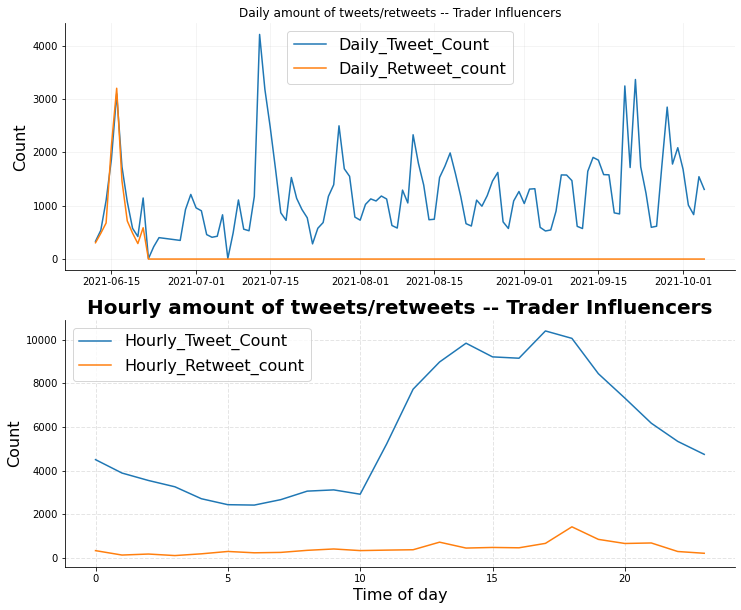

In [23]:
fig, ax = plt.subplots(2,1,figsize = (12,10))

ax[0].plot(df_time_series['Date'], df_time_series['tweets_Count'],'-',markersize=2, label='Daily_Tweet_Count')
ax[0].plot(df_time_series['Date'], df_time_series['retweet_count'],'-',markersize=2, label='Daily_Retweet_count')
ax[0].grid(color = 'grey', alpha =0.1)
ax[0].set_title(('Daily amount of tweets/retweets -- Trader Influencers'))
ax[0].spines['top'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].set_ylabel("Count", fontsize= 16)
ax[0].legend(prop={'size': 16})

ax[1].plot(df_time_series2['Hour'], df_time_series2['tweets_Count'],'-',markersize=2, label='Hourly_Tweet_Count')
ax[1].plot(df_time_series2['Hour'], df_time_series2['retweet_count'],'-',markersize=2, label='Hourly_Retweet_count')
ax[1].grid(color = 'grey', alpha =0.1)
ax[1].set_title(('Hourly amount of tweets/retweets -- Trader Influencers'),fontweight="bold", fontsize=20)
ax[1].grid(linestyle='--', linewidth='1', color = 'grey', alpha =0.2)
ax[1].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].set_xlabel("Time of day", fontsize=16)
ax[1].set_ylabel("Count", fontsize= 16)
ax[1].legend(prop={'size': 16})

# fig.savefig("Tweets_Time_Series", bbox_inches="tight")
plt.show() 

<font size = 5><b><center><a id="section2">2. Preprocessing the dataset</a>

<font color='#008080' size = 4><b><center><a id="section2.1">2.1 Consisting Data types and None types</a>

<font color='##4682B4' size = 3>A problem caused by inconsistence of missing data types, some of the missing data has empty values with string 'None' and others are missing values (nan), replace all None values with nan </font>

In [24]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)

In [25]:
## check Nulls
df.isnull().sum(axis=0)

status_id                0
created_at               0
user_screen_name         0
user_id                  0
followers                0
location             57163
coordinates         136990
is_retweet               0
retweet_count            0
text                     0
topic                    0
hashtags             91911
symbols             132835
user_mentions        82906
urls                 65560
tweets_Count             0
Date                     0
Hour                     0
dtype: int64

<font color='#008080' size = 4><b><center><a id="section2.2">2.2 Drop Unnecessary columns</a>

In [26]:
df = df.drop(columns = ['location'])

<font color='##4682B4' size = 3> Only 7 unique values in coordiantes, column does not contain much information, thus drop it</font>

In [27]:
len(df['coordinates'].unique())

24

In [28]:
df = df.drop(columns = ['coordinates'])

<font color='##4682B4' size = 3> The data indicates all is_retweet is false, therefore drop the column.<br> 
    if is_retweet column is needed, url can bring this column back. Most of twitters do not contain any symbols, so symbols feature is dropped as well</font>

In [29]:
df.groupby('is_retweet').count().reset_index()

is_retweet  status_id  created_at  user_screen_name  user_id  followers  \
0       False     137017      137017            137017   137017     137017   

   retweet_count    text   topic  hashtags  symbols  user_mentions   urls  \
0         137017  137017  137017     45106     4182          54111  71457   

   tweets_Count    Date    Hour  
0        137017  137017  137017

In [30]:
df = df.drop(columns = ['is_retweet'])

In [31]:
df = df.drop_duplicates()

<font size = 4><b><center><a id="section2.3">2.3 Extract all hashtags, symbols and  user_mentions</a>

In [32]:
#pip install tqdm
from tqdm import tqdm # progress bar for loop
import json

In [33]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
text_list = df.text.to_list()

In [35]:
text_all = ' '.join(text_list).split()

In [36]:
def extact_info(text_all, starting_symbol):
    Info_list = [j for j in text_all if j.startswith(starting_symbol)] #eg. capture all hashtags starting with '#'
    info = ' '.join(Info_list)
    info = re.sub(r"[^a-zA-Z0-9]"," ", info).lower() # Removing punct and emojis
    info = lemmatizer.lemmatize(info)
    
    return info

<font color='##4682B4' size = 3> hashtag</font>

In [37]:
hashtag = extact_info(text_all, '#')

<font color='##4682B4' size = 3>Symbol</font>

In [38]:
symbol = extact_info(text_all, "$")

<font color='##4682B4' size = 3>user_mentions</font>

In [39]:
mention = extact_info(text_all, "@")

<font size = 4><b><center><a id="section2.4">2.4 Clean text for LDA (Tokenize)</a> 

In [40]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

#Add the directory that contains the preprocessing.py module to the system path for import 
base_dir = os.getcwd() #get the current working directory 
sys.path.insert(0,base_dir)

import preprocessing
from preprocessing import stop_words, nlp, abbreviations
import string

<font color='##4682B4' size = 3>Define several helper function to do the preprocessing:<br>
1.strip_links: input text, output text, remove links.<br>
2.strip_all_entities: input text, output text, remove all mentions as well as mention user screen names, it is designed espically to deal with situations where there is '_' in user screen name: e.g.: @unusual_whales<br>

In [41]:
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','_']
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def remove_number(text):
    return re.sub("\S*\d\S*", "", text).strip()

def remove_stops_words(text):
    text = [w for w in text if not w in list(stop_words)] #remove stopwords
    return text

def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [42]:
def clean_text2(text):
    text = strip_links(text)
    text = strip_all_entities(text)
    text = remove_number(text)
    return text

<font color='##4682B4' size = 3>
pre_process() takes 5 parameters:<br>
    
<li>df - the dataframe of tweets with a 'text' column</li>
<li> keywords - List of any keywords to remove </li>
<li>rm_emojis - Boolean flag for whether to remove emojis from text </li>
<li>filter_pos - Boolean flag for whether to remove stop words and filter part of speach to just the target parts of speech
    (i.e. ADJ, NOUN, ADV, SYMBOLS, and INTERJECTIONS) </li>
<li>lemm - Boolean flag for whether to lemmatize the text </li>
    
</font>

In [43]:
def pre_process(df):
    df['clean_text'] = df['text'].apply(clean_text2)
    df['clean_text'] = df['clean_text'].str.lower()
    df['clean_text'] = df.clean_text.str.replace('’',"\'")
    df['clean_text'] = df.clean_text.str.replace('#',"").str.replace('$',"").str.replace('%',"").str.replace("-"," ").str.replace("…","")
    df['clean_text'] = df.clean_text.str.replace('“',"").str.replace('”',"").str.replace('—',"")
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_whitespace)
    df['clean_text'] = df.clean_text.apply(lambda x: preprocessing.find_urls(x,rm=True))
    df['clean_text'] = df.clean_text.apply(lambda x: preprocessing.find_emojis(x,rm=True))
    df['clean_text'] = df.clean_text.apply(preprocessing.expand_contractions) #this expands possessie contractions to '... is'
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_apostrophe) #remove any lingering appostrophes in accents or informal abbreviations.
    df['clean_text'] = df.clean_text.apply(preprocessing.remove_handles)
    df['clean_text'] = df.clean_text.apply(remove_punc)
    df['clean_text'] = df.clean_text.apply(tknzr.tokenize)
    df['clean_text'] = df.clean_text.apply(remove_stops_words)

In [44]:
%%time
pre_process(df)

Wall time: 1min 18s


In [45]:
df.clean_text

0         [bringtrumpback, saveamerica, jokebiden, resig...
1         [inclusive, financial, provide, society, popul...
2         [oott, wti, insane, shipping, container, costs...
3                                               [unlimited]
4                                 [long, imploding, nation]
                                ...                        
137012    [dear, jay, behalf, follow, traders, market, c...
137013                                                   []
137014               [comment, smooth, market, functioning]
137015    [precipice, financial, clueless, guard, runnin...
137016                       [borrows, mounting, allowable]
Name: clean_text, Length: 137017, dtype: object

<font size = 5><b><center><a id="section3">3. Wordcloud</a>

In [46]:
from wordcloud import WordCloud
from PIL import Image
base_dir = os.getcwd() #get the current working directory 
from os import path

In [47]:
def wordcloud_func(words, Stop_Words = [], Twitter_Icon = False, feature_name = '', if_save = False):

    #set wordcloud style
    if Twitter_Icon:
        mask = np.array(Image.open(path.join(base_dir, "Twitter.png")))
        data_wordcloud = WordCloud(stopwords = Stop_Words, background_color = "white", collocations = False, 
                                   max_words = 100, contour_width=1,width=800, height=500, mask=mask)
    else:
         data_wordcloud = WordCloud(stopwords = Stop_Words, background_color = "white", collocations = False, 
                                   max_words = 100, contour_width=1,width=800, height=500)
    #produce wordcloud
    data_wordcloud.generate(words)
    #     wordcloud_image = data_wordcloud.to_image()
    plt.subplots(figsize=(15,12))
    plt.imshow(data_wordcloud, interpolation='bilinear')
    plt.title('Most used words in %s'%feature_name,fontweight ='bold', fontsize = 20)
    plt.axis("off")
    
    if if_save:
         plt.savefig('Most used words in %s'%feature_name, bbox_inches="tight")

    plt.show()

<font size = 4><b><center><a id="section3.1">3.1 hashtag</a>

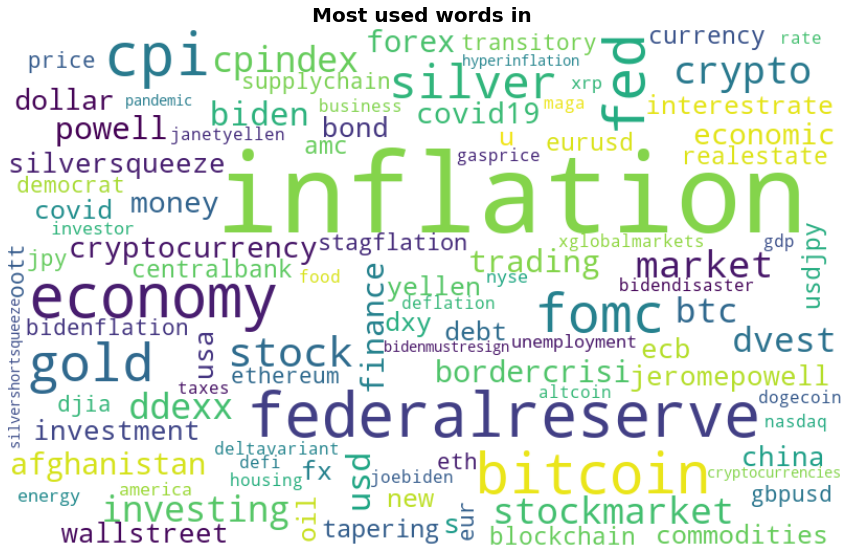

In [48]:
wordcloud_func(hashtag, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

In [49]:
# wordcloud_func(hashtag, Stop_Words = [''], Twitter_Icon = True, feature_name = 'Hashtag', if_save = True)

<font size = 4><b><center><a id="section3.2">3.2 symbol</a>

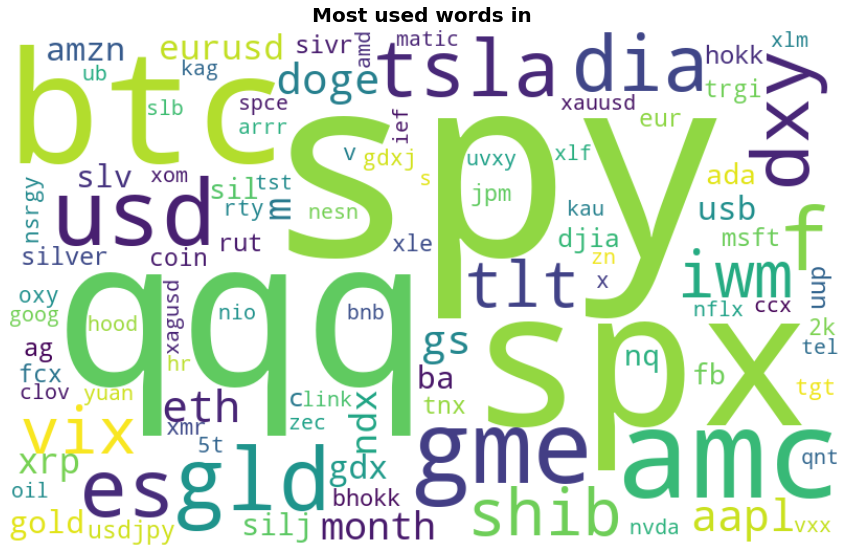

In [50]:
wordcloud_func(symbol, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

<font size = 4><b><center><a id="section3.3">3.3 Hashtag and Symbol</a>

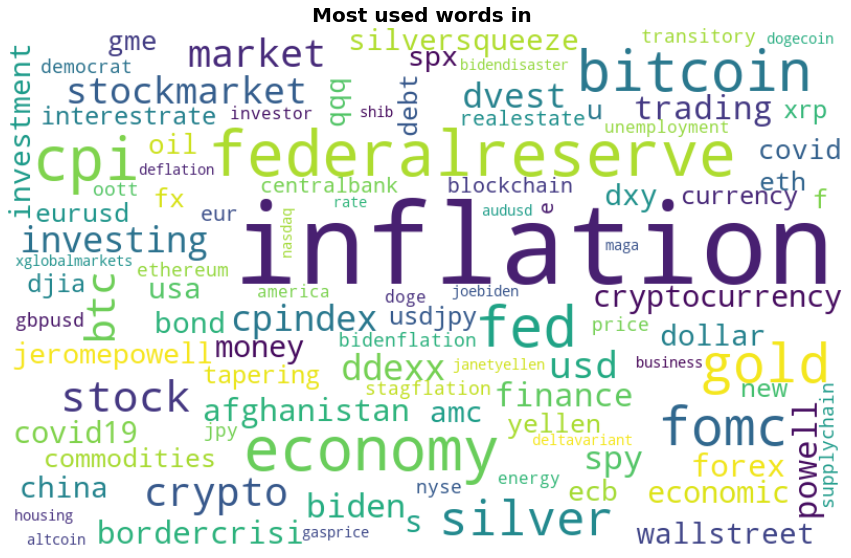

In [51]:
hash_sym = hashtag + ' ' + symbol
wordcloud_func(hash_sym, Stop_Words = [''], Twitter_Icon = False, feature_name = '', if_save = False)

<font size = 4><b><center><a id="section3.4">3.4 Clean Text</a>

In [52]:
clean_text_all = [x for j in df.clean_text for x in j]

In [53]:
clean_text_string = ' '.join(clean_text_all)

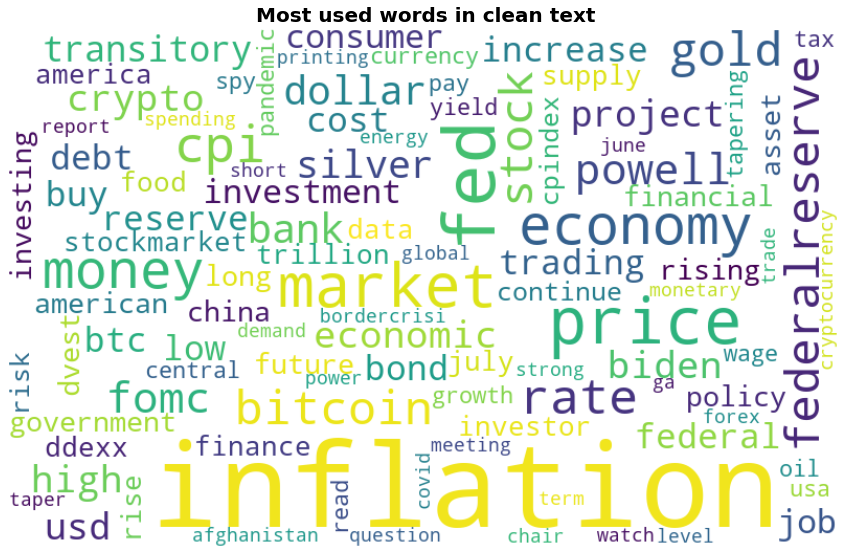

In [54]:
wordcloud_func(clean_text_string, Stop_Words = ['year', 'time', 'good', 'people', 'amp', 'thing', 'bad', 'lot', 'day',
                                               'today', 'understand', 'number', 'great', 'real', 'coming', 'true', 'love',
                                               'live', 'shit', 'ago', 'big','making','human', 'man', 'hope', 'week',
                                               'things', 'happened', 'point', 'wrong', 'work', 'feel', 'month','guy',
                                               'care', 'fact', 'nice', 'life', 'guys', 'reason','start','post', 'thought',
                                               'talk', 'months','happen', 'buying', 'higher', 'friend', 'years', 'person',
                                                'god', 'agree', 'news', 
                                               ],
               Twitter_Icon = False, feature_name = 'clean text', if_save = False)

<font size = 5><b><center><a id="section4">4. Sentiment analysis</a>

In [55]:
def convert_abbrev_in_text(text):
    t=[]
    words = text.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 

In [56]:
def remove_weird_words(text):
    t=[]
    words = text.split()
    t = [w for w in text if not w in list(weird_words)] #remove stopwords
    return ''.join(t)

In [57]:
weird_words = set(['₺','म','ो','द','ी','ह','ै','त','ो','बर','्','ब','ा','द','ी','ह','ै'])

In [58]:
def pre_process_sentiment(df):
    df['text4sentiment'] = df['text'].apply(strip_links)
    df['text4sentiment'] = df['text4sentiment'].apply(strip_all_entities)
    df['text4sentiment'] = df.text4sentiment.str.replace('’',"\'")
    df['text4sentiment'] = df.text4sentiment.str.replace('“',"").str.replace('”',"").str.replace('—',"").str.replace('•',"")
    df['text4sentiment'] = df.text4sentiment.apply(lambda x: convert_abbrev_in_text(x)) #convert abbreiation
    df['text4sentiment'] = df.text4sentiment.apply(preprocessing.remove_whitespace)
    df['text4sentiment'] = df.text4sentiment.apply(lambda x: preprocessing.find_urls(x,rm=True))
    df['text4sentiment'] = df.text4sentiment.apply(lambda x: preprocessing.find_emojis(x,rm=True))
    df['text4sentiment'] = df.text4sentiment.apply(preprocessing.expand_contractions) #this expands possessie contractions to '... is'
    df['text4sentiment'] = df.text4sentiment.apply(preprocessing.remove_handles)
    df['text4sentiment'] = df.text4sentiment.apply(lambda x: remove_weird_words(x))

In [59]:
%%time
pre_process_sentiment(df)

Wall time: 29.6 s


<font size = 4><b><center><a id="section4.1">4.1 Vader</a>

<font color='##4682B4' size = 3>NLTK’s Vader sentiment analysis tool uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics (e.g. increasing the intensity of the sentiment if some words like “really”, “so” or “a bit” are present).</font>

<font color='##4682B4' size = 3>The advantage of this approach is that sentences containing negated positive words (e.g. “not happy”, “not good”) will still receive a negative sentence sentiment (thanks to the heuristics to flip the sentiment of the word following a negation).</font>

<font color='##4682B4' size = 3>The disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).</font>

In [60]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [61]:
def hand_annoate_vader(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        scores = sid.polarity_scores(text)
        print(text)
        print(scores)
        print("-"*110)

In [62]:
hand_annoate_vader(df, 100, 105,'text4sentiment')

I think is running my Twitter feed.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------------------------------------------------------------------------------------------
We made the rich richer...saved you a click
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574}
--------------------------------------------------------------------------------------------------------------
Sr Insurance Policy Analyst - Insurance Policy - Division of Supervision and Regulation #JoinTheFed #ApplyNow More information:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
--------------------------------------------------------------------------------------------------------------
We serve the 1% with our relentless asset buying. You guys are causing the next economic crisis. How can you still be pumping billions in the system - especially when this only gies to the rich. Who elected you?????
{'neg': 0.088, 'neu': 0.733, 'pos': 0.178, 'compound': 0.4871}
-----------

<font size = 4><b><center><a id="section4.2">4.2 Textblob</a>

In [63]:
#pip install textblob

In [64]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import TextBlob

In [65]:
def hand_annoate_textblob(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        scores = TextBlob(text).sentiment
        print(text)
        print(scores)
        print("-"*110)

In [66]:
hand_annoate_textblob(df, 0, 6,'text4sentiment')

#BringTrumpBack #SaveAmerica #JokeBiden needs to resign NOW! Or invoke the 25th. This #Afghanistan, #SouthernBorder, #Inflation, #CovidFailure, #KeystonePipeline, #BidenAdministration is dangerous, disastrous, and a disgrace to America! Literally 7 months!  Done and DONE
Sentiment(polarity=-0.8, subjectivity=0.8500000000000001)
--------------------------------------------------------------------------------------------------------------
An inclusive financial system should provide for all of society, but certain populations face higher, systemic barriers to participate in and benefit from the US economy. Our team explores ways boost participation through new fintech: | #SFFedEquity
Sentiment(polarity=0.15016233766233766, subjectivity=0.3814935064935065)
--------------------------------------------------------------------------------------------------------------
#OOTT #WTI The insane shipping container costs contribute to the hot #inflation in the US.
Sentiment(polarity=-0.375, subject

<font size = 4><b><center><a id="section4.3">4.3 Flair</a>

In [67]:
#pip install flair

In [68]:
from flair.models import TextClassifier
from flair.data import Sentence
import flair
classifier = TextClassifier.load('en-sentiment')

2021-11-28 17:46:45,024 loading file C:\Users\Jingwen\.flair\models\sentiment-en-mix-distillbert_4.pt


In [69]:
def hand_annoate_flair(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        flair_text = flair.data.Sentence(text)
        classifier.predict(flair_text)
        # make score in negative sentiment less than, match up with previous sentiment rules
        if flair_text.labels[0].value == "NEGATIVE":
            flair_score = -1 * flair_text.labels[0].score
        else:
            flair_score = flair_text.labels[0].score
        print(text)
        print(flair_score)
        print("-"*110)

In [70]:
hand_annoate_flair(df, 100, 105,'text4sentiment')

I think is running my Twitter feed.
-0.7868573069572449
--------------------------------------------------------------------------------------------------------------
We made the rich richer...saved you a click
0.9860326647758484
--------------------------------------------------------------------------------------------------------------
Sr Insurance Policy Analyst - Insurance Policy - Division of Supervision and Regulation #JoinTheFed #ApplyNow More information:
0.9750820994377136
--------------------------------------------------------------------------------------------------------------
We serve the 1% with our relentless asset buying. You guys are causing the next economic crisis. How can you still be pumping billions in the system - especially when this only gies to the rich. Who elected you?????
-0.9703450798988342
--------------------------------------------------------------------------------------------------------------
Kraken and others want access to Federal Reserve payme

<font size = 4><b><center><a id="section4.4">4.4 Sentiment packages comparison, correlation, and distribution</a>

In [71]:
def sentiment_comp(df, row_begin, row_end, column):
    for i in range(row_begin,row_end+1):
        text = df.loc[i,column]
        print(text)
        
        ############### VADER ###############
        vader_scores = sid.polarity_scores(text).get('compound') #vader returns a dict, we only need the compound scores
        vader_scores = round(vader_scores,3)
        print("\nVader score is " + str(vader_scores) + "\n")
        
        ############### TEXTBLOB ###############
        textblob_score = TextBlob(text).sentiment
        textblob_polarity = round(textblob_score.polarity,3) # round to 3 decimals
        textblob_subjectivity = round(textblob_score.subjectivity,3)
        print("TextBlob polarity is " + str(textblob_polarity) + ", subjectivity is " + str(textblob_subjectivity) + "\n")
        
        ################ FLAIR ################
        flair_text = flair.data.Sentence(text)
        classifier.predict(flair_text)
        
        # make score in negative sentiment less than, match up with previous sentiment rules
        if flair_text.labels[0].value == "NEGATIVE":
            flair_score = round(-1 * flair_text.labels[0].score,3)
        else:
            flair_score = round(flair_text.labels[0].score,3)
        
        print("Flair score is " + str(flair_score) + "\n")
        print("-"*110)

In [72]:
sentiment_comp(df, 111, 123,'text4sentiment')

Looks healthy… especially when considering where the money is coming from (hint: )

Vader score is 0.0

TextBlob polarity is 0.25, subjectivity is 1.0

Flair score is 0.894

--------------------------------------------------------------------------------------------------------------
Why j powell doing this? #JacksonHole #Fed #usmarkets #inflation

Vader score is 0.0

TextBlob polarity is 0.0, subjectivity is 0.0

Flair score is -1.0

--------------------------------------------------------------------------------------------------------------
If you think #inflation is not real, please explain how I have $10 that also equals $240 ? #Silverbacks #silversqueeze #Silver #ApeStrongTogether #DiamondHands (P.S. If you want, we can have a discussion about #FIAT .)

Vader score is -0.169

TextBlob polarity is -0.1, subjectivity is 0.3

Flair score is -0.998

--------------------------------------------------------------------------------------------------------------
#India needs to break fro

<font color='##4682B4' size = 3> Sentiment analysis works better with orignal text. The cleaning process for sentiment analysis is abandoned</font> 

<font color='##4682B4' size = 3> Get sentiment for each text</font> 

In [73]:
%%time
df['TextBlob_Sentiment'] = df.text4sentiment.apply(lambda x:TextBlob(x).sentiment.polarity)

Wall time: 37.6 s


In [74]:
%%time
df['Vader_Sentiment'] = df.text4sentiment.apply(lambda x:sid.polarity_scores(x)['compound'])

Wall time: 38.1 s


In [75]:
# def flair_sa(text):
#     flair_text = Sentence(text)
#     classifier.predict(flair_text)
#     # make score in negative sentiment less than, match up with previous sentiment rules
#     if flair_text.labels[0].value == "NEGATIVE":
#         return -1 * flair_text.labels[0].score
#     else:
#         return flair_text.labels[0].score

In [76]:
# %%time
# df['Flair_Sentiment'] = df.text4sentiment.apply(lambda x:flair_sa(x))

<font color='##4682B4' size = 3.5> Distribution</font> 

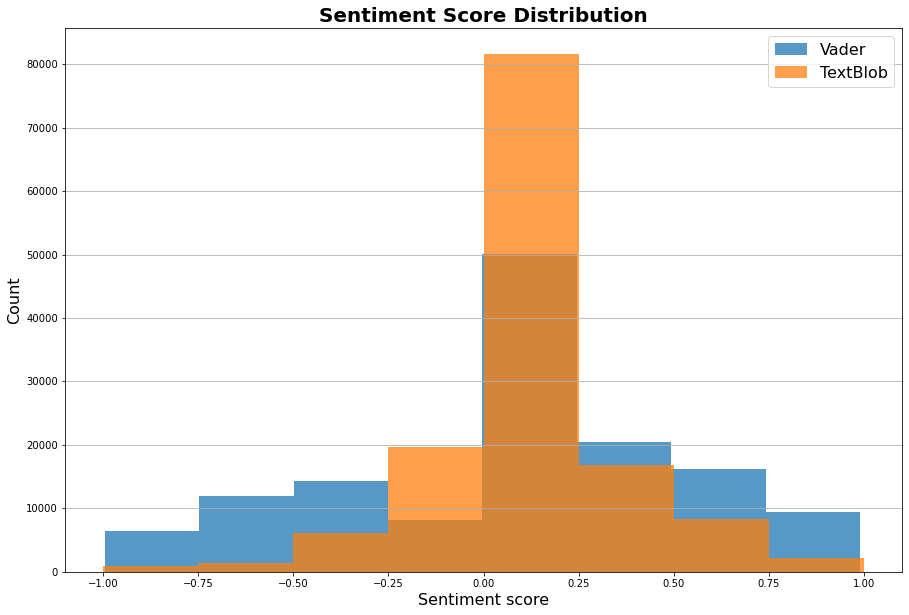

In [77]:
fig, ax = plt.subplots(1,1,figsize = (15,10))

ax.hist(df['Vader_Sentiment'], bins= 8, alpha=0.75, label = 'Vader')
ax.hist(df['TextBlob_Sentiment'], bins= 8, alpha=0.75, label = 'TextBlob')
ax.set_title('Sentiment Score Distribution',fontsize = 20, fontweight ='bold')
ax.grid(axis='y')
ax.set_xlabel("Sentiment score", fontsize = 16)
ax.set_ylabel("Count",fontsize = 16)
ax.legend(prop={'size': 16})

# ax[1].hist(df['Flair_Sentiment'], bins= 10, rwidth=0.99, alpha=0.75, label = 'Flair')
# ax[1].grid(axis='y')
# ax[1].set_xlabel("Sentiment score", fontsize = 16)
# ax[1].set_ylabel("Count",fontsize = 16)
# ax[1].legend(prop={'size': 16})

# fig.savefig("Sentiment_distribution", bbox_inches="tight")
plt.show()

<font color='##4682B4' size = 3> Get daily average sentiment</font> 

In [78]:
df_sa = df.groupby(['Date']).mean()
df_sa = df_sa.reset_index()

In [79]:
# Sentiment_corr = pd.concat([df_sa['Vader_Sentiment'],df_sa['TextBlob_Sentiment'], df_sa['Flair_Sentiment'],df_time_series['tweets_Count']], axis=1)
Sentiment_corr = pd.concat([df_sa['Vader_Sentiment'],df_sa['TextBlob_Sentiment'],df_time_series['tweets_Count']], axis=1)

<font color='##4682B4' size = 3.5> Correlation ( of above daily average data)</font> 

In [80]:
correlation_mat = Sentiment_corr.corr()
correlation_mat

Vader_Sentiment  TextBlob_Sentiment  tweets_Count
Vader_Sentiment            1.000000            0.717112     -0.319787
TextBlob_Sentiment         0.717112            1.000000     -0.249309
tweets_Count              -0.319787           -0.249309      1.000000

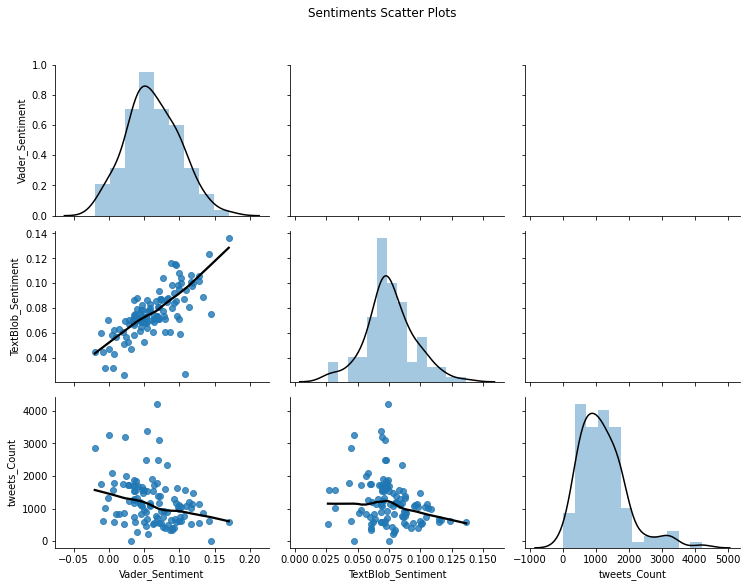

<Figure size 432x288 with 0 Axes>

In [81]:
import seaborn as sns
g = sns.PairGrid(Sentiment_corr, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'}) #lower triangle
g.map_diag(sns.distplot, kde_kws={'color': 'black'}) #diagonal

#title:
g.fig.suptitle('Sentiments Scatter Plots', y=1.08)

plt.show()
plt.cla()
plt.clf()

<font size = 4><b><center><a id="section4.5">4.5 Time series of sentiment analysis</a>

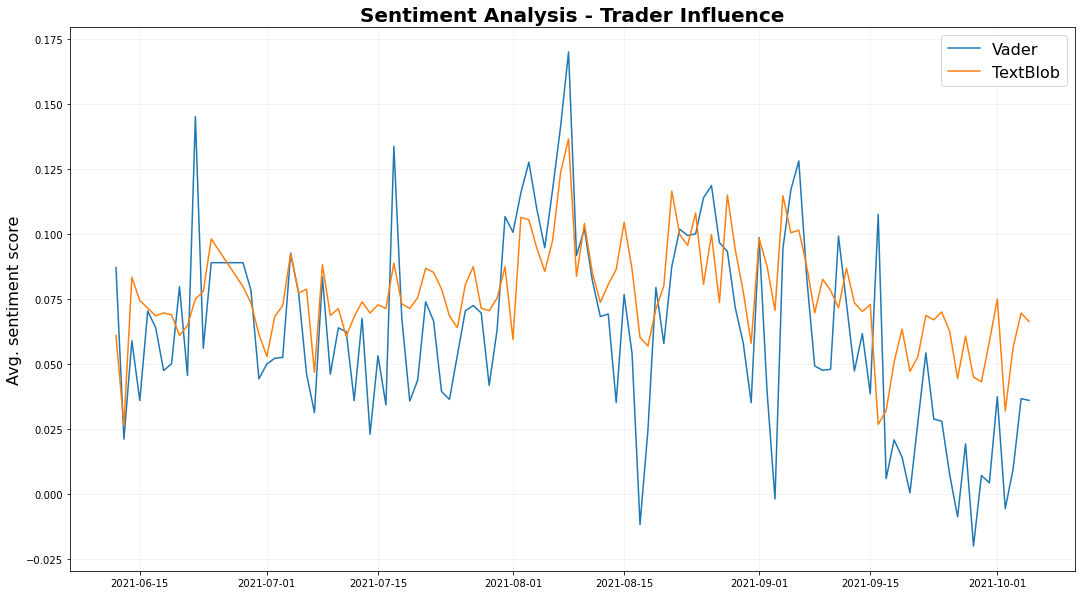

In [82]:
fig, ax = plt.subplots(1,1,figsize = (18,10))

ax.plot(df_sa['Date'], df_sa['Vader_Sentiment'],'-',markersize=2, label='Vader')
ax.plot(df_sa['Date'], df_sa['TextBlob_Sentiment'],'-',markersize=2, label='TextBlob')
# ax[0].plot(df_sa['Date'], df_sa['Flair_Sentiment'],'-',markersize=2, label='Flair')
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Sentiment Analysis - Trader Influence'),fontweight ='bold', fontsize = 20)
ax.set_ylabel(('Avg. sentiment score'), fontsize = 16)
ax.legend(prop={'size': 16},loc='upper right')

# ax[1].plot(df_time_series['Date'], df_time_series['tweets_Count'],'-',markersize=2, label='Daily_Tweet_Count')
# ax[1].plot(df_sa['Date'], df_sa['Vader_Sentiment']*5000,'-',markersize=2, label='Vader Sentiment Score*5000')
# # ax[1].plot(df['Date'], df_time_series['retweet_count'],'-',markersize=2, label='Daily_Retweet_count')
# ax[1].grid(color = 'grey', alpha =0.1)
# ax[1].set_title(('Daily amount of tweets/retweets -- Trader Influencers'),fontweight ='bold', fontsize = 20)
# ax[1].set_ylabel(('Count/Sentiment Score'), fontsize = 16)
# ax[1].legend(prop={'size': 16}, loc='upper right')

fig.savefig("Sentiment_Time_Series", bbox_inches="tight")
plt.show() 

<font size = 5><b><center><a id="section5">5. LDA</a>

<font color='##4682B4' size = 3> Filter the dataframe</font> 

In [83]:
# max_days_ago = 7

#filter dates 
# latest_date= max(df.Date)

# earliest_date = latest_date - datetime.timedelta(days=max_days_ago)

earliest_date = datetime.date(2021, 6, 15)

latest_date= datetime.date(2021, 6, 30)

In [84]:
latest_date

datetime.date(2021, 6, 30)

In [85]:
earliest_date

datetime.date(2021, 6, 15)

In [86]:
#filter for 15 days 
df_model = df[(df['Date'] >= earliest_date)&(df['Date'] <= latest_date)]
len(df_model)

13058

<font size = 4><b><center><a id="section5.0">5.0 Lemmatization</a>

In [87]:
import spacy, gensim, nltk

In [88]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [89]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [90]:
%%time
data_lemmatized = lemmatization(df_model.clean_text.to_list(), allowed_postags=['NOUN', 'ADJ', 'VERB','ADV'])

Wall time: 40min 27s


In [91]:
print(data_lemmatized[:5])

['inflation month guy understand complexity move part cdnecon inflation', 'type infamyau tag accidentally inflation bad', 'woman watch wo', 'inflation', 'polarise pretty bunkered camp']


In [97]:
def process_text(data: list, ngrams: str) -> list:
    '''
    Input:
        data: list of strings
    Output:
        perform text transformation and return list of processed strings
    '''
    
    # split text strings into tokens
    data = [doc.split() for doc in data]

    # form n-grams
    if ngrams == "freq":
        bigram_mod = preprocessing.build_bigram_models(data)  # using corpus with no retweets.
        data_words_ngrams = preprocessing.make_freq_bigrams(data, bigram_mod)
    elif ngrams == "bi":
        data_words_ngrams = list(map(all_bigrams, data))
    elif ngrams == "tri":
        data_words_ngrams = list(map(all_trigrams, data))
    else:
        data_words_ngrams = data

    return [' '.join(doc) for doc in data_words_ngrams]  # join tokens in each doc to make a list of strings


In [95]:
data_lda = process_text(data_lemmatized, 'freq')

In [96]:
print(data_lda[:5])

['inflation month guy understand complexity move part cdnecon inflation', 'type infamyau tag accidentally inflation bad', 'woman watch wo', 'inflation', 'polarise pretty bunkered camp']


<font color='##4682B4' size = 3> Only left noun and ngram word</font> 

In [98]:
def keep_noun(texts,  allowed_postags=['NOUN']):
    texts_out = []
    for sent in texts:
        doc = nlp(sent)
        texts_out.append(" ".join([str(token) for token in doc if (token.pos_ in allowed_postags or '_' in str(token)) ]))
    return texts_out

In [99]:
%%time
data_lda2 = keep_noun(data_lda)

Wall time: 43min 51s


In [100]:
data_lda2[:5]

['inflation month guy complexity part cdnecon inflation',
 'type infamyau tag inflation',
 'woman wo',
 'inflation',
 'camp']

<font color='##4682B4' size = 3> wordcloud for lemmatized text</font> 

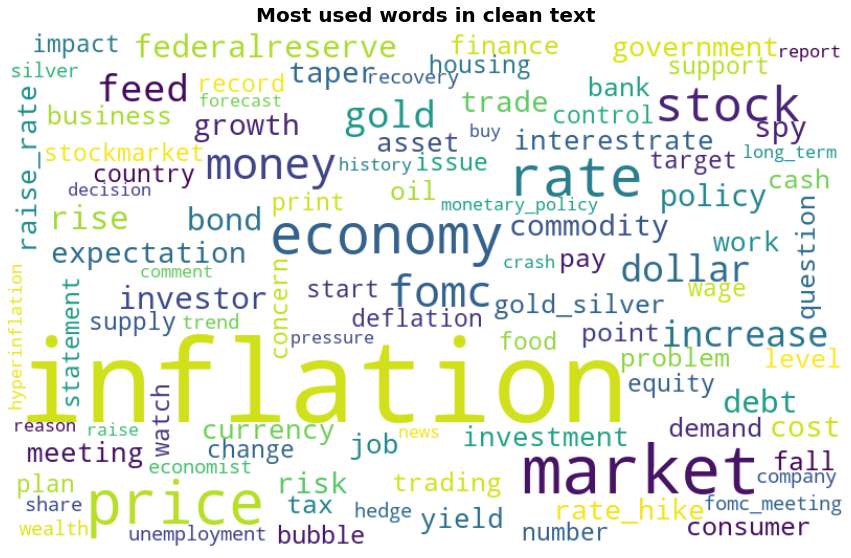

In [101]:
wordcloud_func(" ".join(data_lda2), Stop_Words = ['people', 'year', 'time', 'thing', 'week', 'person', 'today',
                                                    'lot', 'month', 'man', 'folk','hour',
                                                    'bit', 'congratulation', 'day', 'guy', 'matter', 'thought',
                                                    'tomorrow', 'morning', 'year_ago', 'dude', 'good_morning', 'feel',
                                                    'month_ago', 'yesterday','mind', 'talk', 'sense',
                                                    'stupid','fool','scumbag','bestie', 'love',
                                                    'friend', 'stuff','week_ago', 'hour_ago', 'moron'],
               Twitter_Icon = False, feature_name = 'clean text', if_save = False)

In [102]:
# delete some words that frequently shows but useless according from wordcloud 
Useless_Words_wc = ['people', 'year', 'time', 'thing', 'week', 'person', 'today',
                    'lot', 'month', 'man', 'folk','hour',
                    'bit', 'congratulation', 'day', 'guy', 'matter', 'thought',
                    'tomorrow', 'morning', 'year_ago', 'dude', 'good_morning', 'feel',
                    'month_ago', 'yesterday','mind', 'talk', 'sense',
                    'stupid','fool','scumbag','bestie', 'love',
                    'friend', 'stuff','week_ago', 'hour_ago', 'moron'
                   ]

In [103]:
def remove_useless_words(text):
    text = [w for w in text if not w in Useless_Words_wc] #remove useless words
    return text

In [104]:
data_for_modeling = [remove_useless_words(text.split()) for text in data_lda2]

In [105]:
data_for_modeling[:5]

[['inflation', 'complexity', 'part', 'cdnecon', 'inflation'],
 ['type', 'infamyau', 'tag', 'inflation'],
 ['woman', 'wo'],
 ['inflation'],
 ['camp']]

<font size = 4><b><center><a id="section5.1">5.1 A Base Gensim LDA Model</a>

<font color='black' size = 3>The corpus is the list of bag-of-word vectors for each tweet in the data set. Each vector in the corpus is made of a list of tuple pairs of the form (token_id,count), representing the word counts for each word in the tweet.</font>


In [106]:
import gensim.corpora as corpora

# load dictionary
id2word = corpora.Dictionary(data_for_modeling) #dictionary
print(len(id2word))

6981


In [107]:
corpus = [id2word.doc2bow(doc) for doc in data_for_modeling if doc != []]
len(corpus)

11813

<font color='black' size = 3>Documentation: https://radimrehurek.com/gensim/models/ldamodel.html#gensim.models.ldamodel.LdaModel</font>


In [108]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [109]:
import pyLDAvis
import pyLDAvis.gensim_models #note, in newer versions of pyLDAvis, this is pyLDAvis.gensim_models

In [110]:
%%time
#Create a base Model
lda_model = LdaModel(corpus = corpus, id2word=id2word,
                    num_topics = 8,
                    random_state=42,
                    chunksize=200, #default is 2000
                    iterations=50, #50 by default 
                    passes=10,
                    per_word_topics=True)

Wall time: 17.3 s


 <font color='black' size = 3> 
    
The coherence score is one way of estimating the quality of the topic model. There are many different types of coherence metrics and maximizing coherence doesn't necessarily maximize subjective interpretability of the models. But a very low coherence score is bad. <br/>   
coherence: {'u_mass', 'c_v', 'c_uci', 'c_npmi'} – Coherence measure to be used. Fastest method - ‘u_mass’, ‘c_uci’ also known as c_pmi. For ‘u_mass’ corpus should be provided, if texts is provided, it will be converted to corpus using the dictionary. For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided (corpus isn’t needed) <br/>
    
docs: https://radimrehurek.com/gensim/models/coherencemodel.html
</font> 


In [111]:
%%time 
# Perplexity: lower the better.
print('Perplexity: ', lda_model.log_perplexity(corpus))

#Coherence: the higher the better
coherencemodel = CoherenceModel(model=lda_model, texts=data_for_modeling, corpus=corpus, coherence='c_v')
print('\nCoherence Score: ', coherencemodel.get_coherence())

Perplexity:  -7.904074100538657

Coherence Score:  0.4313443451844059
Wall time: 20.4 s


In [112]:
# Filtering for words 
Words_LDA = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]

# Create Topics
Topics_LDA = [' '.join(t[0:10]) for t in Words_LDA]

# Getting the topics
for id, t in enumerate(Topics_LDA): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
inflation work government demand watch growth rate corn cash meeting

------ Topic 1 ------
market stock inflation product bond control term couple good_luck crash

------ Topic 2 ------
inflation gold_silver gold raise_rate temporary_phenomenon investor_investment ongoing_concern key_question strategist_address supply

------ Topic 3 ------
dollar debt buy game producer_price purchase_power shrink miss fall central_bank

------ Topic 4 ------
inflation risk cost commodity market discipline company sell uranium gbtcbitcoinfor

------ Topic 5 ------
inflation feed economy currency issue investor print_money job policy xglobalmarket

------ Topic 6 ------
rate inflation money bank fomc federalreserve market economy catch entity

------ Topic 7 ------
inflation price increase food rise expectation taper record consumer fraud



In [103]:
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word,mds='mmds') 
# vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
9      0.372385  0.198196       1        1  9.048463
8      0.101616 -0.350037       2        1  8.024627
13    -0.306029 -0.236212       3        1  6.960221
14    -0.079171  0.356417       4        1  6.845042
11     0.252728 -0.227216       5        1  6.412439
1      0.283547 -0.090807       6        1  6.200832
2      0.076319  0.290435       7        1  5.945136
5     -0.123467 -0.289987       8        1  5.621445
4     -0.319205  0.069881       9        1  5.328607
0      0.139480  0.170481      10        1  5.203232
15     0.227405  0.038513      11        1  5.002777
6      0.015447  0.077623      12        1  4.814972
10    -0.233755 -0.061572      13        1  4.577006
7     -0.221168  0.227192      14        1  4.540975
12    -0.009043 -0.184574      15        1  4.241457
16    -0.138865  0.107385      16        1  4.151107
17     0.034048 -0.076918      17        1  3.996687
3     -0.072272 -0.018800      18        1  3.084976, topic_info=         Term        Freq       Total Category  logprob  loglift
602       oil  558.000000  558.000000  Default  30.0000  30.0000
580      sell  415.000000  415.000000  Default  29.0000  29.0000
539       buy  308.000000  308.000000  Default  28.0000  28.0000
47      money  340.000000  340.000000  Default  27.0000  27.0000
321       bad  257.000000  257.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1269     mind    0.099221    1.773942  Topic18  -9.2939   0.5950
6280   induce    0.099188    1.773142  Topic18  -9.2942   0.5951
1298  problem    0.099327    1.777647  Topic18  -9.2928   0.5940
1383     fund    0.099288    1.777414  Topic18  -9.2932   0.5937
880      lose    0.099215    1.775787  Topic18  -9.2939   0.5939

[614 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
292      11  0.958375     ability
721      11  0.668329  accomplish
582      16  0.909007      action
138       9  0.967687      actual
174      10  0.849882          ad
...     ...       ...         ...
644       1  0.965856       worth
7         4  0.988870       write
97       17  0.986497       wrong
608      12  0.957011       yield
574       3  0.958420       young

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 14, 15, 12, 2, 3, 6, 5, 1, 16, 7, 11, 8, 13, 17, 18, 4])

<font size = 4><b><center><a id="section5.2">5.2 Gensim LDA Tuning</a>

<font color='##4682B4' size = 4> Optimum number of topics </font> 

In [113]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [114]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def tunning_number_topics(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    
    for num_topics in range(start, limit, step):    
        model = LdaModel(corpus = corpus, id2word=id2word,
                    num_topics = num_topics,
                    random_state=42,
                    chunksize=200, #default is 2000
                    iterations=50, #50 by default 
                    passes=10,
                    alpha = 0.99,
                    eta = 0.01,
                    per_word_topics=True)
        
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, corpus=corpus, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [149]:
%%time
model_list_topic, coherence_values_topic = tunning_number_topics(dictionary = id2word,
                                                                    corpus =corpus,
                                                                    texts = data_for_modeling,
                                                                    start=28, limit=32, step=1) # Can take a long time to run.

Wall time: 3min 34s


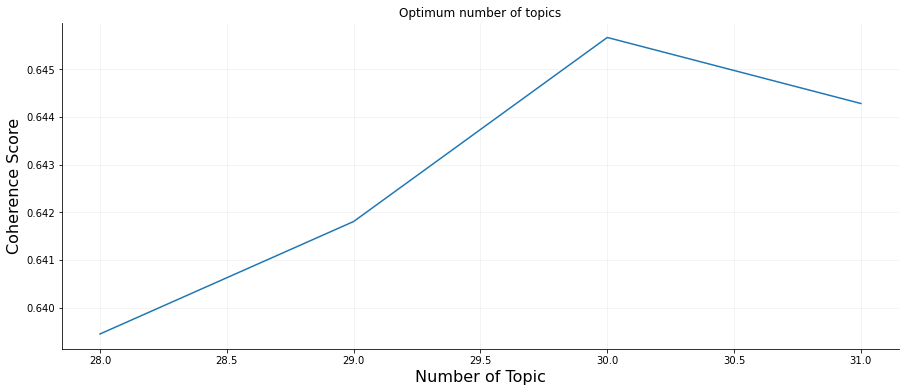

In [150]:
fig, ax = plt.subplots(1,1,figsize = (15,6))

ax.plot(list(range(28, 32, 1)), coherence_values_topic,'-',markersize=2)
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Optimum number of topics'))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel("Coherence Score", fontsize= 16)
ax.set_xlabel("Number of Topic", fontsize= 16)
plt.savefig('lda_topic_tuning2.jpg', bbox_inches="tight")
plt.show() 


<font color='##4682B4' size = 4> Other parameters </font> 

<font color='black' size = 4>
<li>random_state - this serves as a seed (in case you wanted to repeat exactly the training process) </li>
<br/>
<li>chunksize - Number of documents to load into memory at a time and process E step of EM before updating the model. Each E step of Expectation Maximization algorithm takes into account this number of documents at once and updates the matrix only after it finishes the calculation on the "chunk". Size of the chunk determines the performance of the process - the more documents in memory at once - the better.</li>
<br/>
<li>passes - how many times the algorithm is supposed to pass over the whole corpus. The number of times you want to go through the entire corpus.</li>
<br/>
<li>update_every: number of chunks to process prior to moving onto the M step of EM.</li>
<br/>
<li>iteration - The higher the number the more times the algorithm goes through the whole set of documents.It is iterated over more times.</li>
<br/>
<li>per_word_topics - setting this to True allows for extraction of the most likely topics given a word. The training process is set in such a way that every word will be assigned to a topic. Otherwise, words that are not indicative are going to be omitted. </li>
<br/>
<li>phi_value -  is another parameter that steers this process - it is a threshold for a word treated as indicative or not.</li>
<br/>
<li>alpha - Document-Topic Density: can be set to an explicit array = prior of your choice. It also support special values of ‘asymmetric’ and ‘auto’: the former uses a fixed normalized asymmetric 1.0/topicno prior, the latter learns an asymmetric prior directly from your data. </li>
    
    High α means every document is likely to contain a mixture of most of the topics and not just any single topic specifically.

    Low α means A document is more likely to be represented by just a few of the topics
<li> beta - Word-Topic Density</li>

    High β means each topic is likely to contain a mixture of most of the words not just any word specifically.

    Low β means the topic may contain a mixture of just a few words.
    
</font> 

<font color='##4682B4' size = 4> Tunning #of_topics, alpha and beta</font> 

In [137]:
# Topic range
min_topic = 30
max_topic = 40
step = 1

#Alpha
alpha = list(np.arange(0.01,1,0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

#Beta parameter
beta = list(np.arange(0.01,1,0.3))
beta.append('symmetric')

number_of_models = len(range(min_topic, max_topic, step))*len(alpha)*len(beta)

In [77]:
import tqdm

model_results = {
    "Topics": [],
    'Alpha': [],
    'Beta': [],
    'Coherence': []
}

if 1==1:
    pbar = tqdm.tqdm(total = number_of_models)
    for k in range(min_topic, max_topic, step): # Topic range
        for a in alpha:
                for b in beta:
                    model = LdaModel(corpus = corpus, id2word=id2word,
                                    num_topics = k,
                                    random_state=42,
                                    chunksize=200, #default is 2000
                                    iterations=50, #50 by default 
                                    passes=10,
                                    alpha = a,
                                    eta = b,
                                    per_word_topics=True)
                    
                    coherencemodel = CoherenceModel(model=model, texts=data_for_modeling, dictionary=id2word, corpus=corpus, coherence='c_v')
                    cv = coherencemodel.get_coherence()
                
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                
                    pbar.update(1)     
                    
    model_results_df = pd.DataFrame(model_results)
    model_results_df.to_csv('lda_tuning_results2.csv', index = False)
    pbar.close

100%|█████████████████████████████████████████████████████████████████████████████| 336/336 [15:55:20<00:00, 22.97s/it]

In [78]:
model_results_df.sort_values('Coherence', ascending=False)

Topics       Alpha       Beta  Coherence
318      17        0.97       0.01   0.714444
192      14        0.97       0.01   0.713243
234      15        0.97       0.01   0.711923
276      16        0.97       0.01   0.706573
228      15        0.73       0.01   0.705295
..      ...         ...        ...        ...
251      15  asymmetric  symmetric   0.537139
105      12        0.73       0.73   0.536679
63       11        0.73       0.73   0.536503
69       11        0.97       0.73   0.532023
28       10        0.97       0.97   0.525956

[336 rows x 4 columns]

<font color='##4682B4' size = 4> Checking if other parameters influence the result</font> 

In [154]:
coherence_values_topic = []

for k in [100, 150, 200, 250, 300, 350]:
    model = LdaModel(corpus = corpus, id2word=id2word,
                    num_topics = 30,
                    random_state=42,
                    chunksize= k, #default is 2000
                    iterations=50, #50 by default 
                    passes=10,
                    alpha = 0.99,
                    eta = 0.01,
                    per_word_topics=True)

    coherencemodel = CoherenceModel(model=model, texts=data_for_modeling, dictionary=id2word, corpus=corpus, coherence='c_v')
    coherence_values_topic.append(coherencemodel.get_coherence())


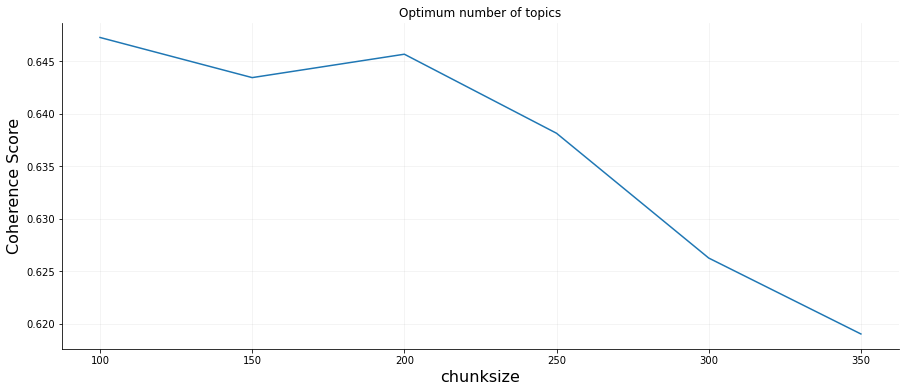

In [156]:
fig, ax = plt.subplots(1,1,figsize = (15,6))

ax.plot([100, 150, 200, 250, 300, 350], coherence_values_topic,'-',markersize=2)
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Optimum number of topics'))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylabel("Coherence Score", fontsize= 16)
ax.set_xlabel("chunksize", fontsize= 16)
plt.show() 

<font size = 4.5><b><center><a id="section5.3">5.3 Gensim Results</a>

In [157]:
%%time
#Create a base Model
best_lda = LdaModel(corpus = corpus, id2word=id2word,
                    num_topics = 30,
                    random_state = 42,
                    chunksize = 100,
                    iterations = 50, #50 by default 
                    passes = 10,
                    alpha = 0.99,
                    eta = 0.01,
                    per_word_topics=True)

Wall time: 56.6 s


In [158]:
%%time 
# Perplexity: lower the better.
print('Perplexity: ', best_lda.log_perplexity(corpus))

#Coherence: the higher the better
coherencemodel = CoherenceModel(model=best_lda, texts=data_for_modeling, corpus=corpus, coherence='c_v')
print('\nCoherence Score: ', coherencemodel.get_coherence())

Perplexity:  -62.74873252497167

Coherence Score:  0.6472593569768509
Wall time: 25.2 s


<font size = 4><b><center><a id="section5.3.1">5.3.1 Visualization</a>

<font color='##4682B4' size = 4> Interactive visualization of the topicst</font> 

In [ ]:
# help(pyLDAvis.prepare)

In [373]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(best_lda, corpus, id2word,mds='tnse') 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.269048  0.445527       1        1  3.606572
19     0.267421 -0.018793       2        1  3.598331
9      0.264832 -0.050238       3        1  3.473596
18     0.264255 -0.052011       4        1  3.413305
22     0.266436 -0.039023       5        1  3.399641
27     0.263279 -0.054196       6        1  3.396673
6      0.265350 -0.047669       7        1  3.344466
11     0.262672 -0.055186       8        1  3.333892
24    -0.170423  0.001920       9        1  3.324726
4     -0.154953  0.000345      10        1  3.317200
26    -0.167164  0.000544      11        1  3.313792
17    -0.115657 -0.002441      12        1  3.310230
3     -0.195133  0.002019      13        1  3.310211
14    -0.116876 -0.001380      14        1  3.307635
8      0.145704 -0.022088      15        1  3.303574
2     -0.052144 -0.003931      16        1  3.302971
16     0.262580 -0.055340      17        1  3.294307
21    -0.167589  0.002169      18        1  3.293440
12     0.259811 -0.056302      19        1  3.292532
20     0.031298 -0.007917      20        1  3.292475
0     -0.177837  0.001493      21        1  3.290001
15    -0.197420  0.001699      22        1  3.286651
5     -0.133477  0.000110      23        1  3.282720
13    -0.171700  0.002054      24        1  3.281939
23    -0.151585  0.001340      25        1  3.279245
1     -0.198202  0.002182      26        1  3.278893
28    -0.201315  0.002015      27        1  3.277878
10    -0.212060  0.002682      28        1  3.269445
29    -0.149642  0.002685      29        1  3.265825
25    -0.089510 -0.002266      30        1  3.257835, topic_info=          Term          Freq         Total Category  logprob  loglift
2    inflation  19904.000000  19904.000000  Default  30.0000  30.0000
106       rate   1911.000000   1911.000000  Default  29.0000  29.0000
139     market   1913.000000   1913.000000  Default  28.0000  28.0000
16     economy   1870.000000   1870.000000  Default  27.0000  27.0000
54       price   1743.000000   1743.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
12       level      0.025908    302.331606  Topic30 -11.3293  -5.9406
15      reason      0.025908    301.196936  Topic30 -11.3293  -5.9369
16     economy      0.025908   1870.236347  Topic30 -11.3293  -7.7629
17     finance      0.025908    292.268785  Topic30 -11.3293  -5.9068
20        join      0.025908     60.321922  Topic30 -11.3293  -4.3288

[1194 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
143      27  0.997037        account
40       15  0.997290         action
314       7  0.989131            amc
208       3  0.966346        bailout
295      23  0.995479        banking
...     ...       ...            ...
199      20  0.996085           wage
312      18  0.998741         wealth
8        17  0.996719          woman
319      15  0.998686  xglobalmarket
173      11  0.998627          yield

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 20, 10, 19, 23, 28, 7, 12, 25, 5, 27, 18, 4, 15, 9, 3, 17, 22, 13, 21, 1, 16, 6, 14, 24, 2, 29, 11, 30, 26])

In [212]:
pyLDAvis.save_html(vis, 'lda_visual_trader_influencers.html')

In [162]:
# save to html of the interactive visualization
# pyLDAvis.save_html(vis,'myLDAvisualization.html')

<font color='##4682B4' size = 4> Top 10 keywords of each topic</font> 

In [214]:
%pprint
# This is another way to show the top 10 keywords in each topic (topics are in no particular order)
lda_topics = best_lda.show_topics(-1, formatted=False)
lda_topics

Pretty printing has been turned ON


[(0,
  [('inflation', 0.558294),
   ('pressure', 0.11480677),
   ('power', 0.08228914),
   ('fact', 0.07953703),
   ('metal', 0.03639487),
   ('loss', 0.035357077),
   ('boom', 0.018087525),
   ('borderline', 1.0787707e-05),
   ('integration', 1.0787707e-05),
   ('counterfeiting', 1.0787707e-05)]),
 (1,
  [('inflation', 0.68837196),
   ('mining', 0.062159974),
   ('chart', 0.05857722),
   ('high_level', 0.04147662),
   ('case', 0.03283503),
   ('industry', 0.03215177),
   ('solution', 0.013397481),
   ('disappear', 1.0184949e-05),
   ('counterfeiting', 1.0184949e-05),
   ('ponzidata', 1.0184949e-05)]),
 (2,
  [('gold', 0.43840787),
   ('inflation', 0.20401196),
   ('point', 0.12700826),
   ('sign', 0.105942935),
   ('roll', 0.041292608),
   ('union', 1.1946154e-05),
   ('integration', 1.1946154e-05),
   ('everyday', 1.1946154e-05),
   ('bath', 1.1946154e-05),
   ('membership', 1.1946154e-05)]),
 (3,
  [('inflation', 0.6669521),
   ('pay', 0.10762585),
   ('mortgage', 0.060163315),
   (

<font size = 4><b><center><a id="section5.3.2">5.3.2 topic keywords importance</a>

In [226]:
from collections import Counter 
import math,random

In [302]:
def plot_importance(lda_model, input_df, plot_name, start_topic_i): # plot function that will be called by other functions
    target_plot_counts = math.ceil(lda_model.num_topics / 9)
    target_plot_name = 'keyword_importance' + str(target_plot_counts)
    
    #a list of random colors
    color_list = ["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(9 * target_plot_counts)]
    
    cur_fig, cur_axes = plt.subplots(3, 3, figsize = (30, 18), dpi = 200) # 3 subplots each line, 3 lines in total
    
    for _, ax in enumerate(cur_axes.flatten()):
        if start_topic_i < lda_model.num_topics:
            cur_color = color_list[start_topic_i]
            ax.bar(x = 'word', height = 'word_count',
                   data = input_df.loc[input_df.topic_id == start_topic_i,:],
                   color = cur_color,
                   width = 0.5,
                   alpha = 0.35,
                   label = 'Count')
            
            ax_twin = ax.twinx()
            
            ax_twin.bar(x = 'word',
                        height = 'importance',
                        data = input_df.loc[input_df.topic_id == start_topic_i,:],
                        color = cur_color,
                        width = 0.2,
                        alpha = 0.99,
                        label = 'Importance')

            ax.set_ylabel('Word Count', color = cur_color, fontsize = 12) # label and color
            ax.set_title('Topic: ' + str(start_topic_i), color = cur_color, fontsize = 16)
            ax.set_xticklabels(input_df.loc[input_df.topic_id == start_topic_i, 'word'],
                               rotation = 35,
                               horizontalalignment = 'right',
                               fontsize = 22)

            # combine legends for ax and ax twin together, locate it to upper right of each subplot
            handles, labels = [(a + b) for a, b in zip(ax.get_legend_handles_labels(), ax_twin.get_legend_handles_labels())]
            ax.legend(handles, labels, loc = 1, fontsize = 16) # 1 for 'upper right'
            start_topic_i += 1
            
    if plot_name == target_plot_name:
        cur_fig, cur_axes = remove_excess_subplots(num_topics = lda_model.num_topics, fig = cur_fig, axes = cur_axes)
    
    cur_fig.tight_layout(w_pad = 2)
    cur_fig.suptitle('Word Count and Importance of Topic Keywords', fontsize = 15, y = 1.05)
    plt.savefig(plot_name)

In [303]:
def topic_keywords_importance(lda_model, data_for_modeling):
    topics = lda_model.show_topics(num_topics = -1, formatted=False)
    flat_data_for_modeling = [w for w_list in data_for_modeling for w in w_list] # convert all df_lemmatize to single list
    counter = Counter(flat_data_for_modeling)
    
    keyword_counter = []
    for i, topic in topics:
        for word, weight in topic:
            keyword_counter.append([word, i, weight, counter[word]])
    
    keyword_counter_df = pd.DataFrame(keyword_counter, columns=['word', 'topic_id', 'importance', 'word_count'])
    
    start_topic = 0
    for i in range(math.ceil(lda_model.num_topics / 9)):
        cur_plot_name = 'keyword_importance' + str(i + 1)
        print('\nPlotting ' + cur_plot_name + '...')
        plot_importance(lda_model = lda_model,
                        input_df = keyword_counter_df,
                        plot_name = cur_plot_name,
                        start_topic_i = start_topic)
        
        start_topic += 9
        print('\nPlot ' + cur_plot_name  + ' has been saved!\n')

In [304]:
def remove_excess_subplots(num_topics, fig, axes): # will be called by other helpers
    if num_topics % 9 == 0:
        fig, axes = fig, axes
    else:
        plot_counts = math.ceil(num_topics / 9)
        topic_list = [i for i in range(plot_counts * 9)] # list of topic numbers
        coordinates_list = []

        for k in range(plot_counts):
            for i in range(3):
                for j in range(3):
                    coordinates_list.append([i,j])
        excess_subplots_dict = dict(zip(topic_list, coordinates_list))
        excess_subplots_dict = {k: v for k, v in excess_subplots_dict.items() if k > (num_topics - 1)}

    excess_subplots_list = list(excess_subplots_dict.values())
    for coordiante in excess_subplots_list:
        fig.delaxes(axes[coordiante[0]][coordiante[1]])
    return fig, axes


Plotting keyword_importance1...

Plot keyword_importance1 has been saved!


Plotting keyword_importance2...

Plot keyword_importance2 has been saved!


Plotting keyword_importance3...

Plot keyword_importance3 has been saved!


Plotting keyword_importance4...

Plot keyword_importance4 has been saved!



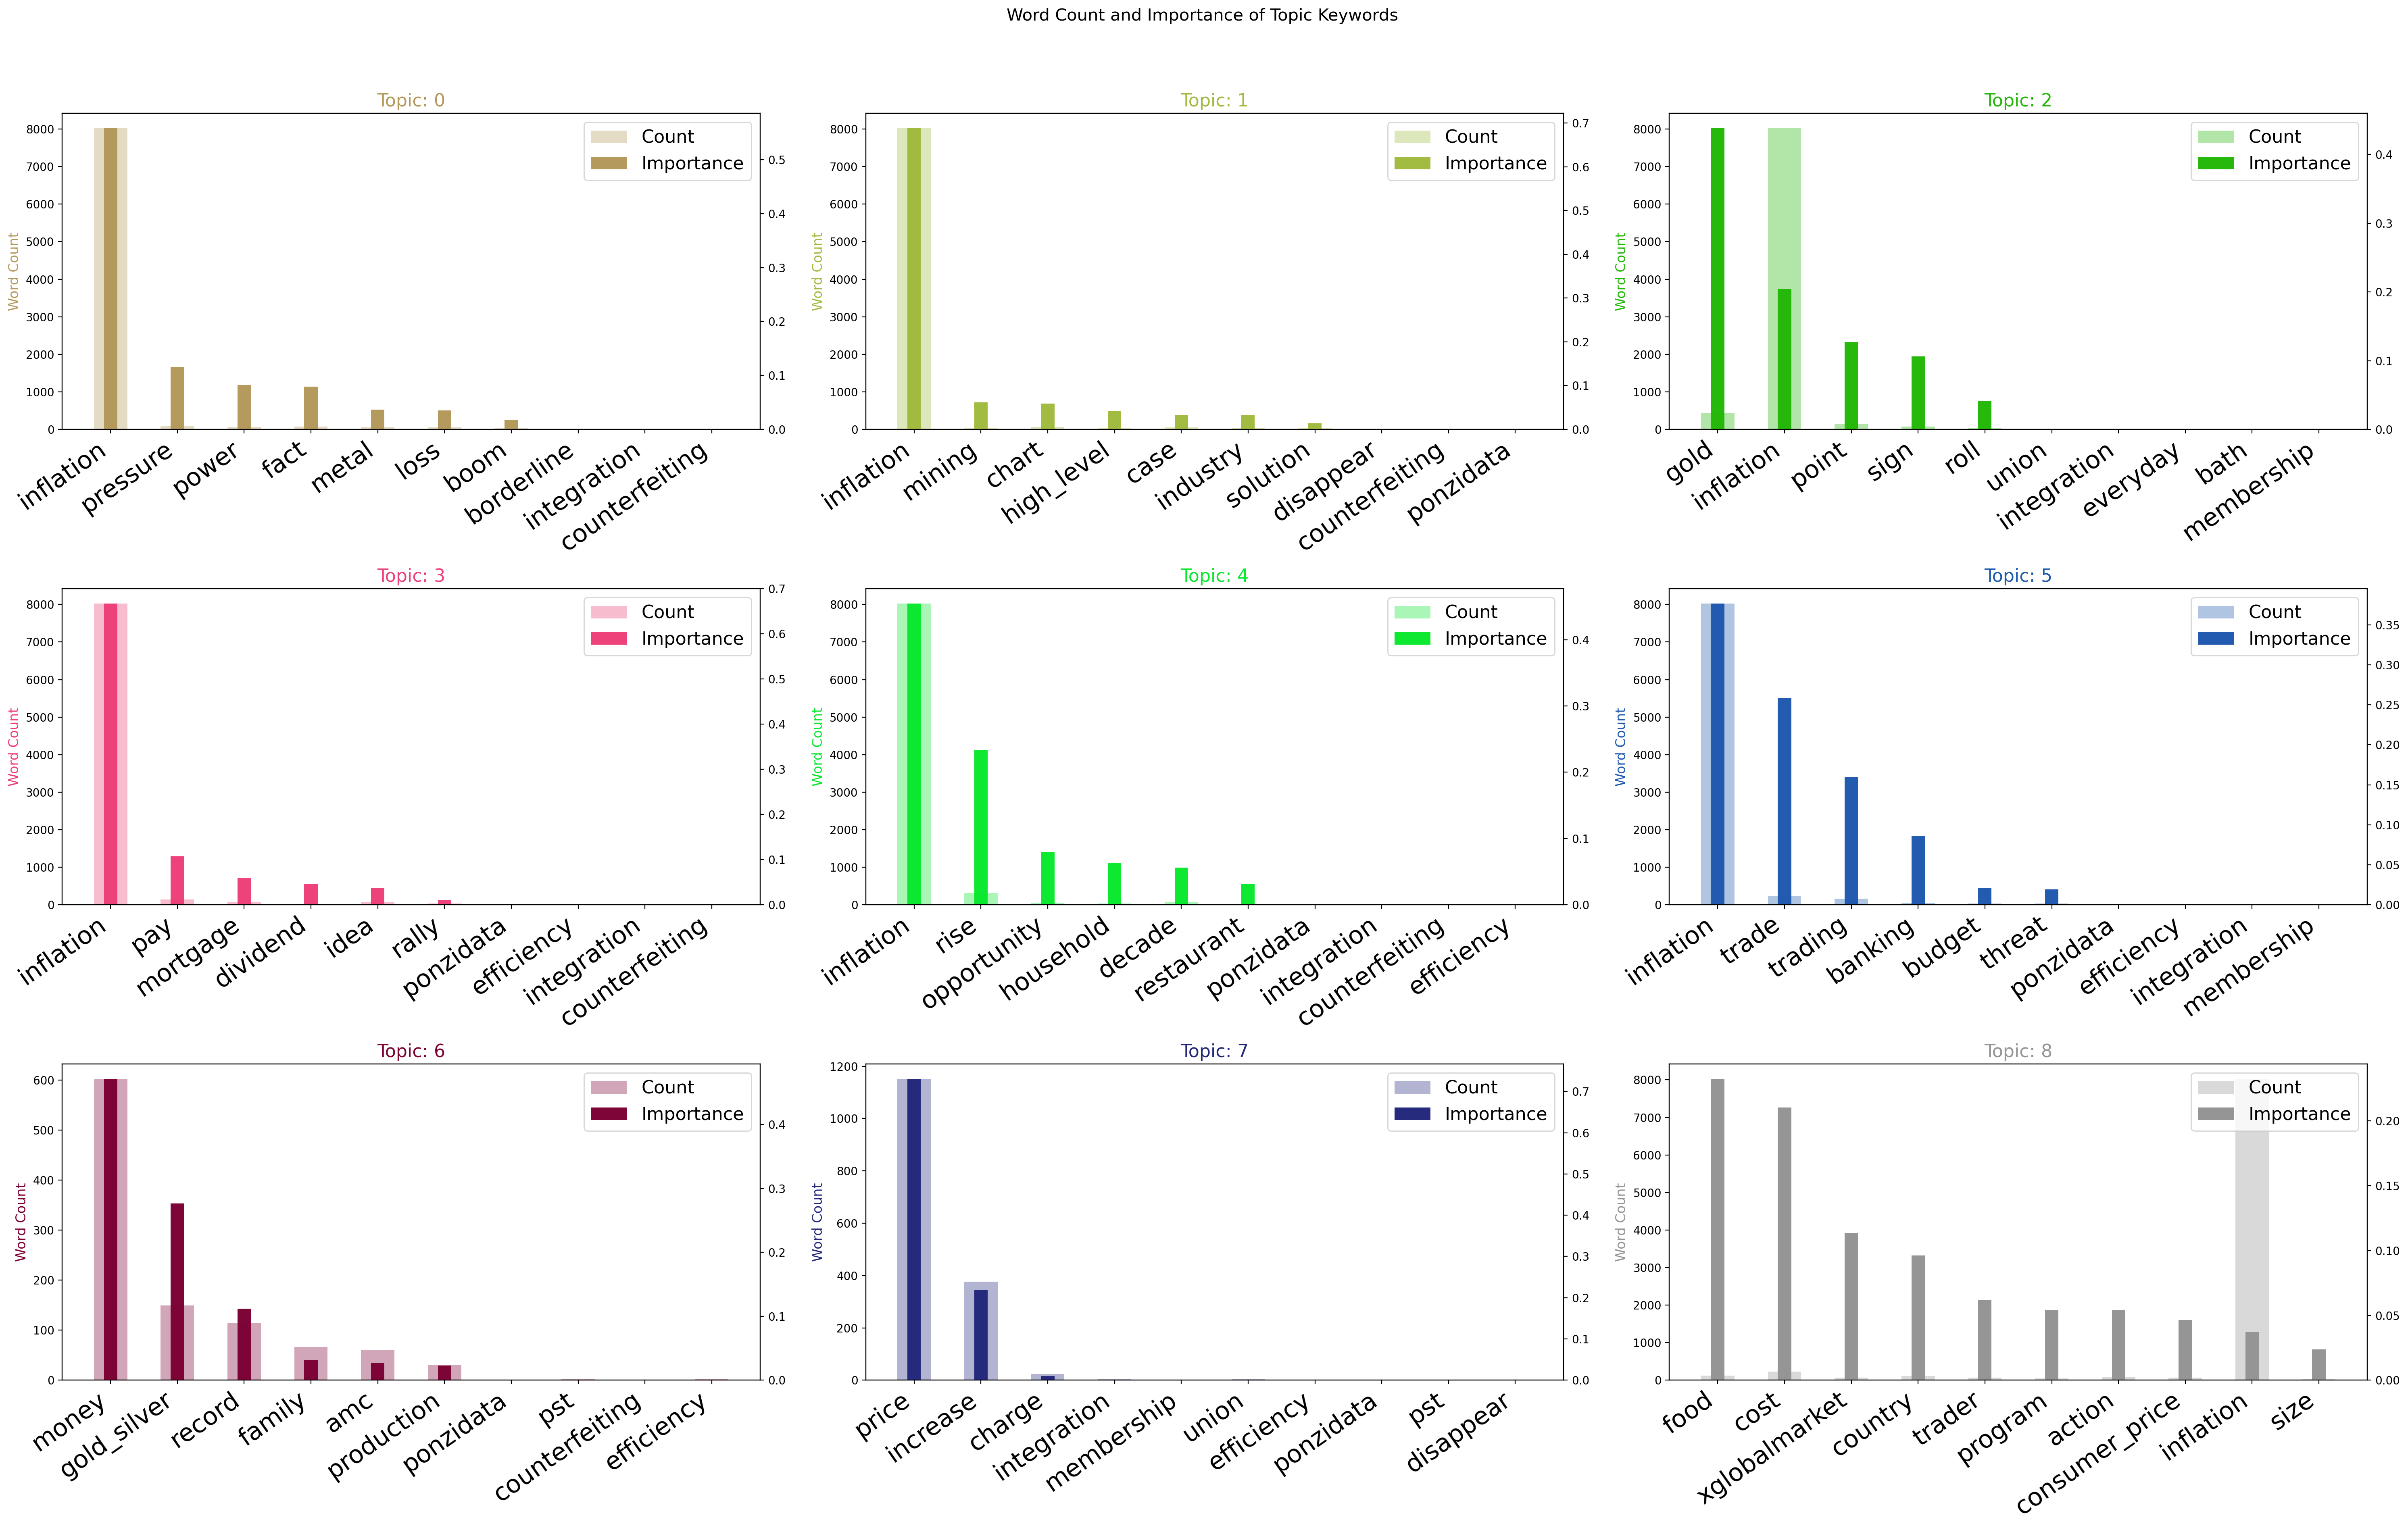

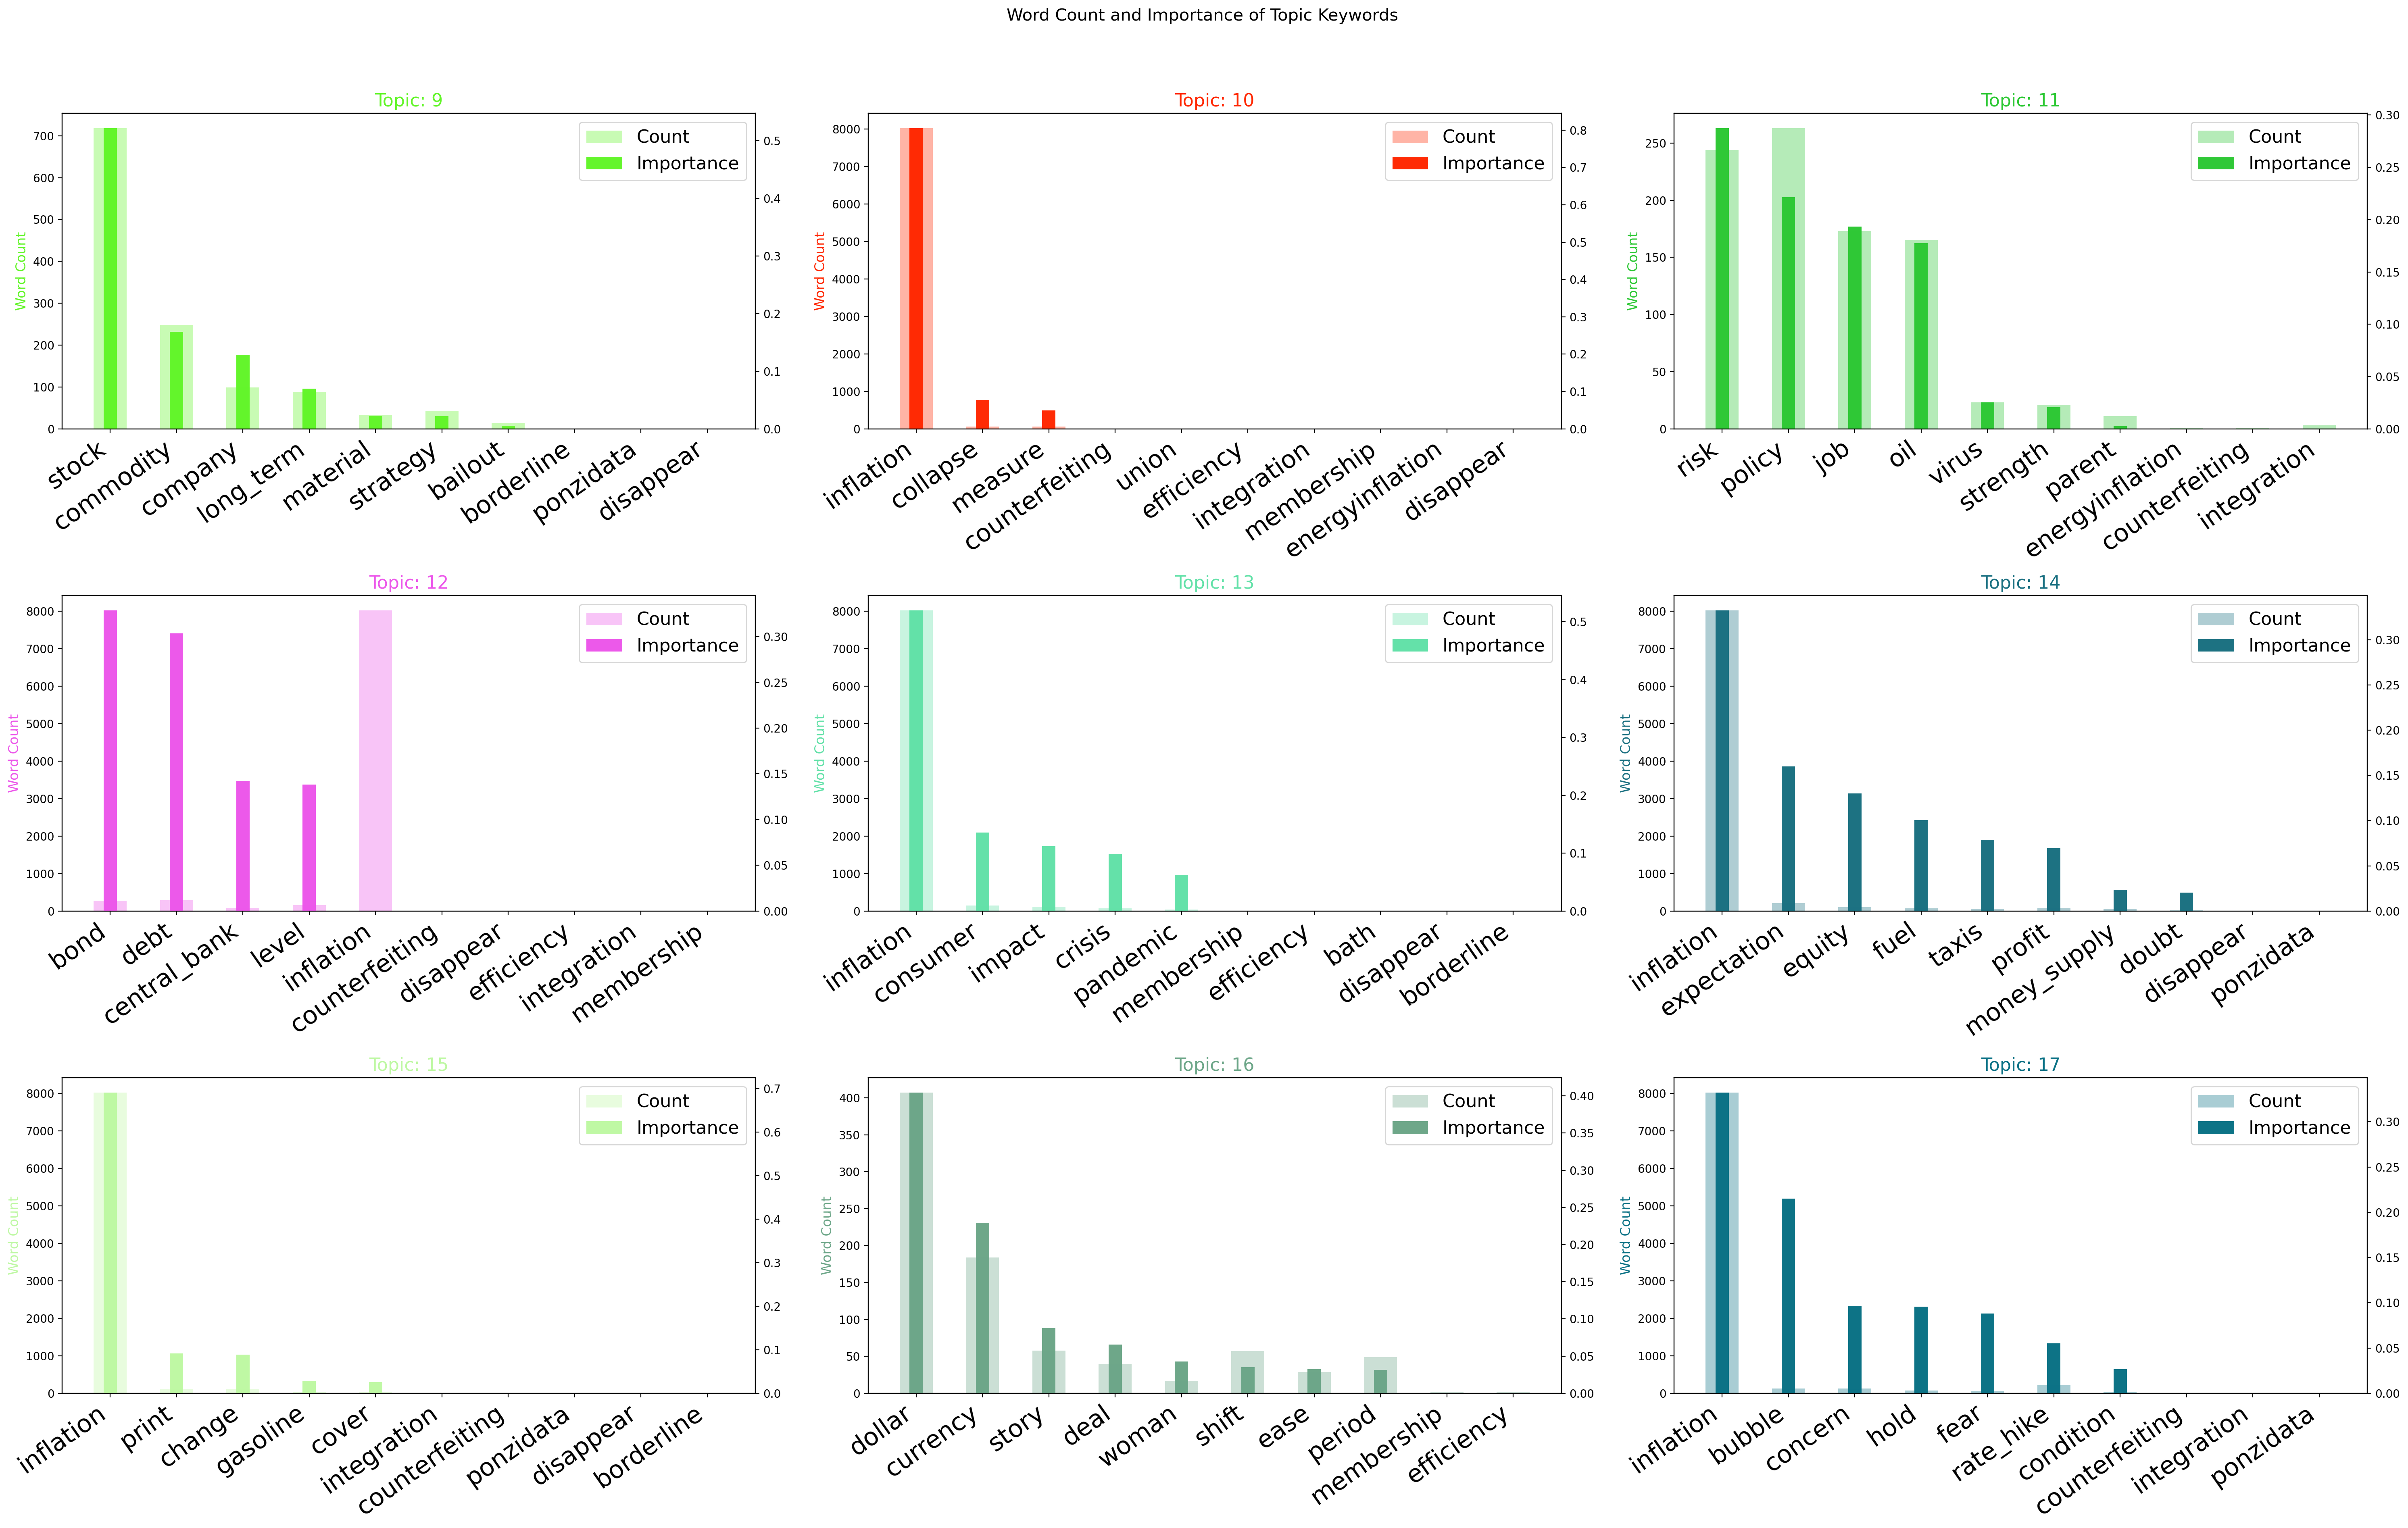

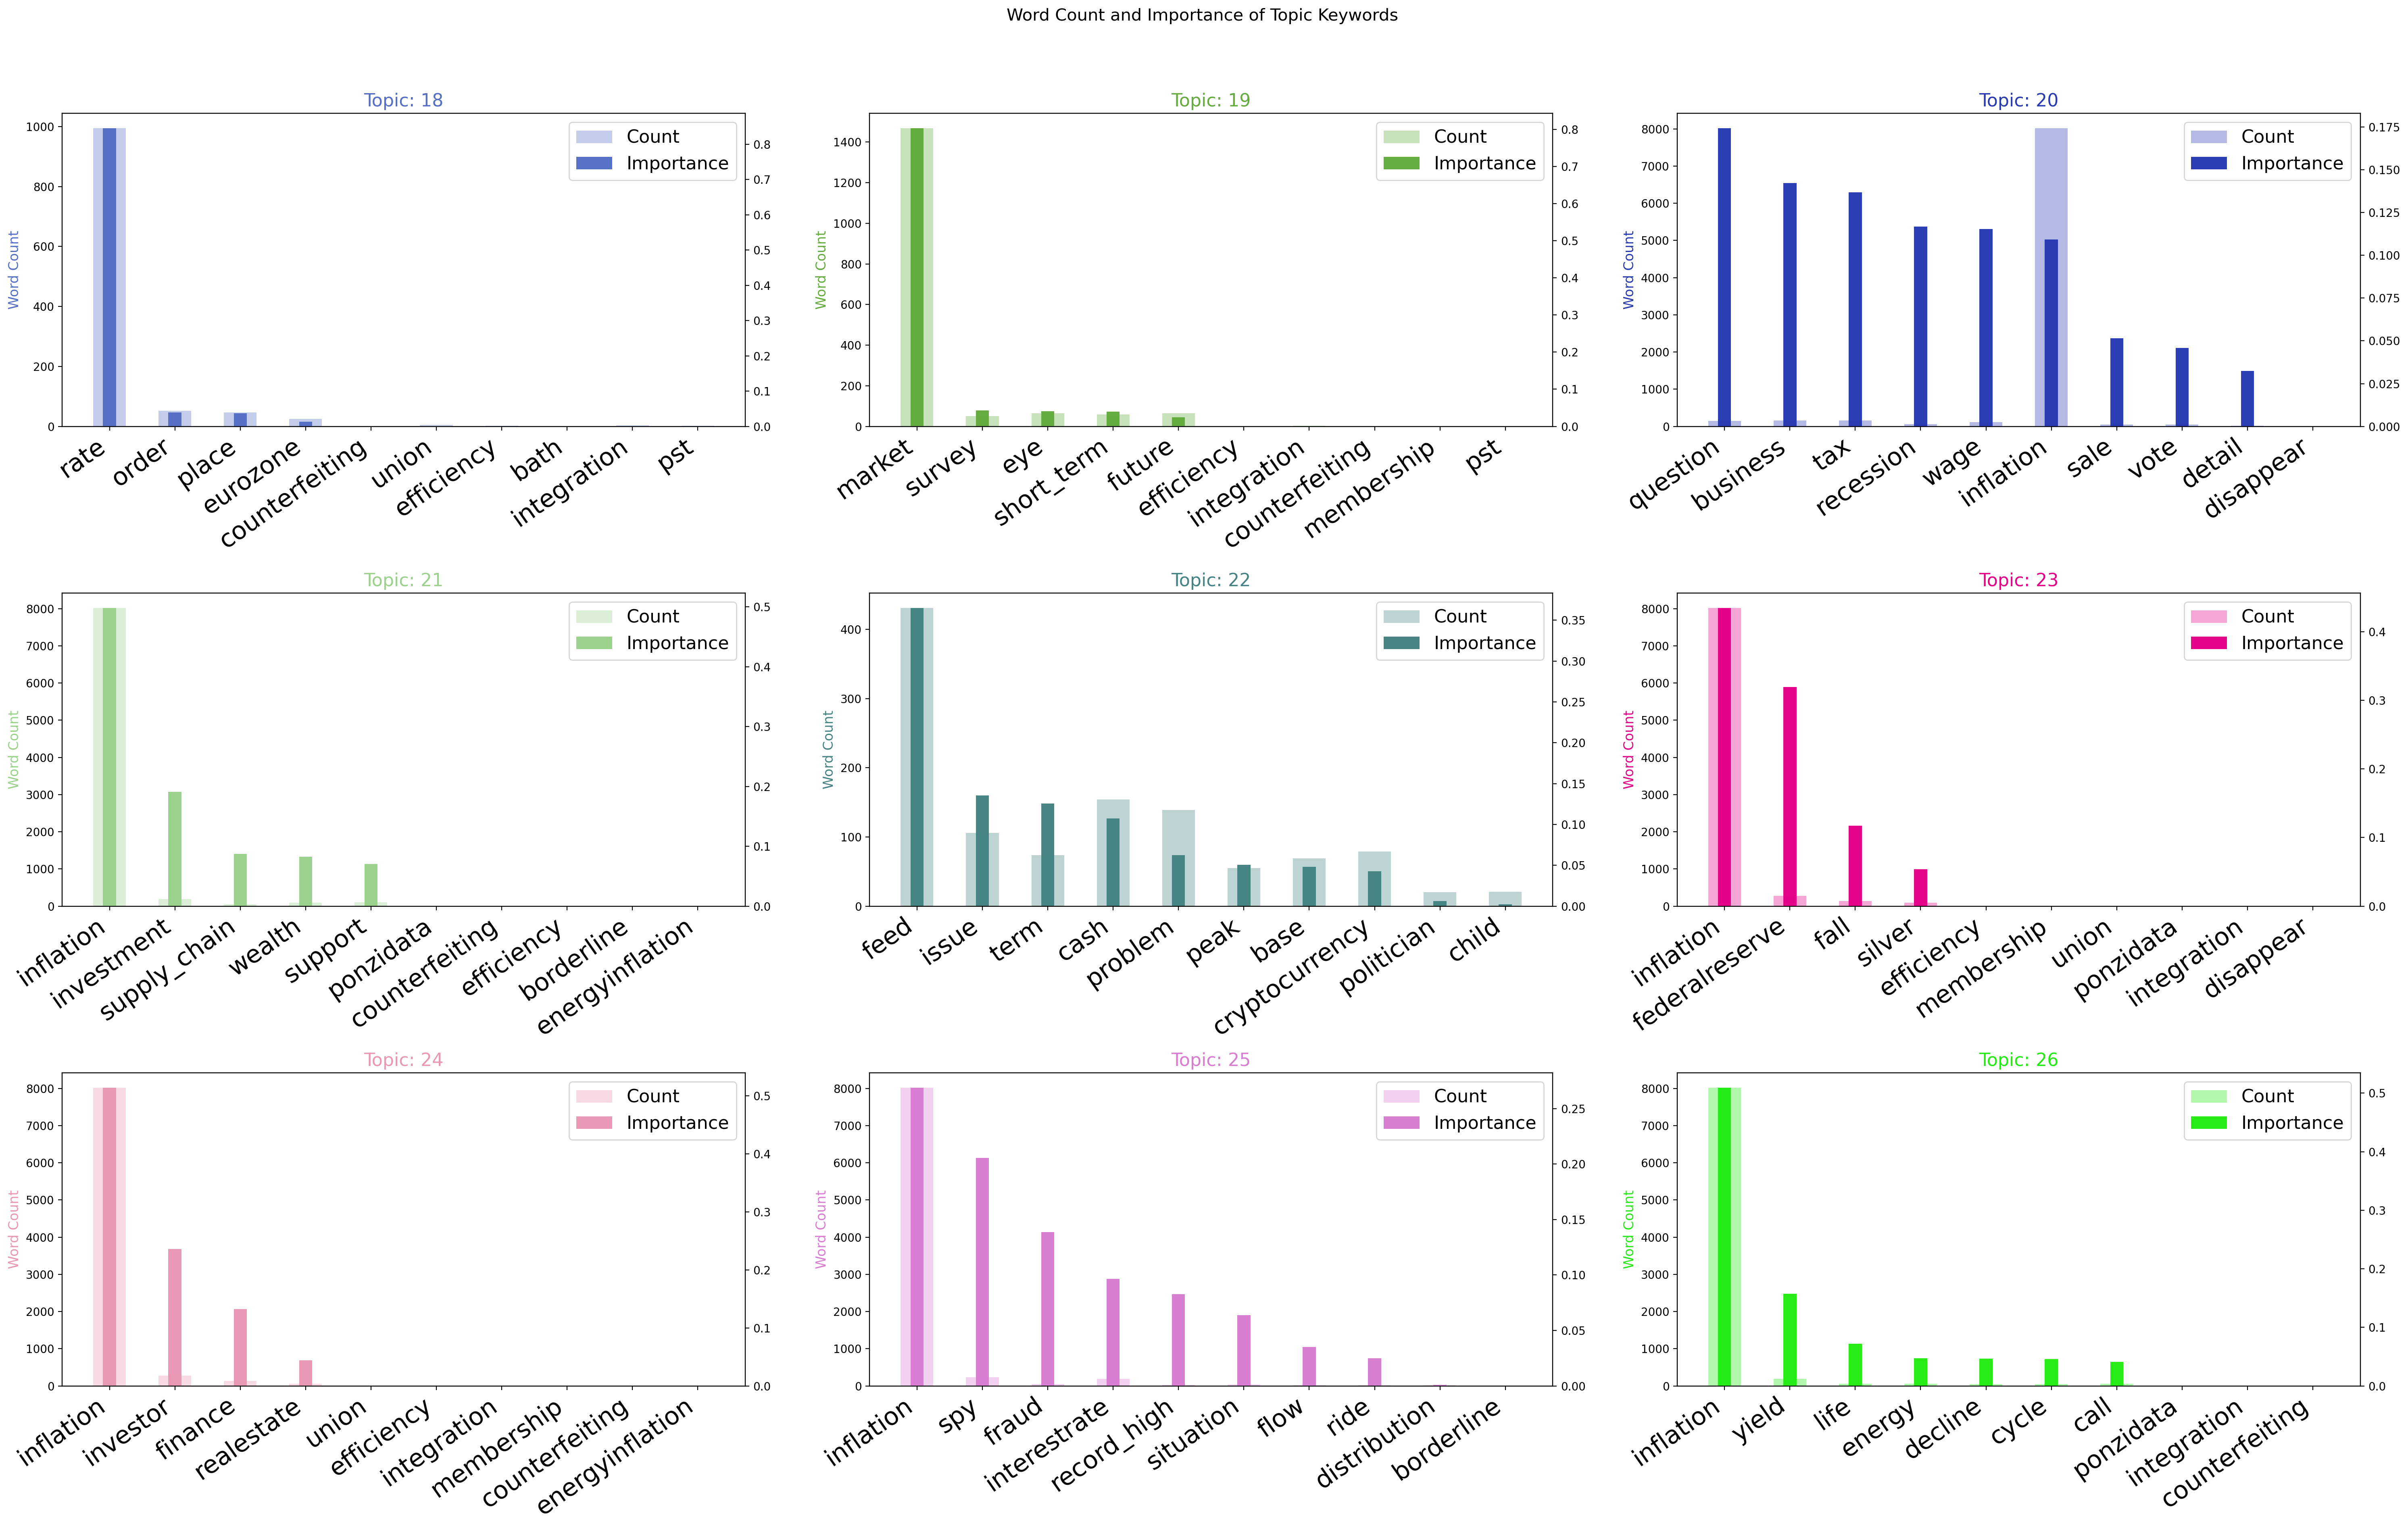

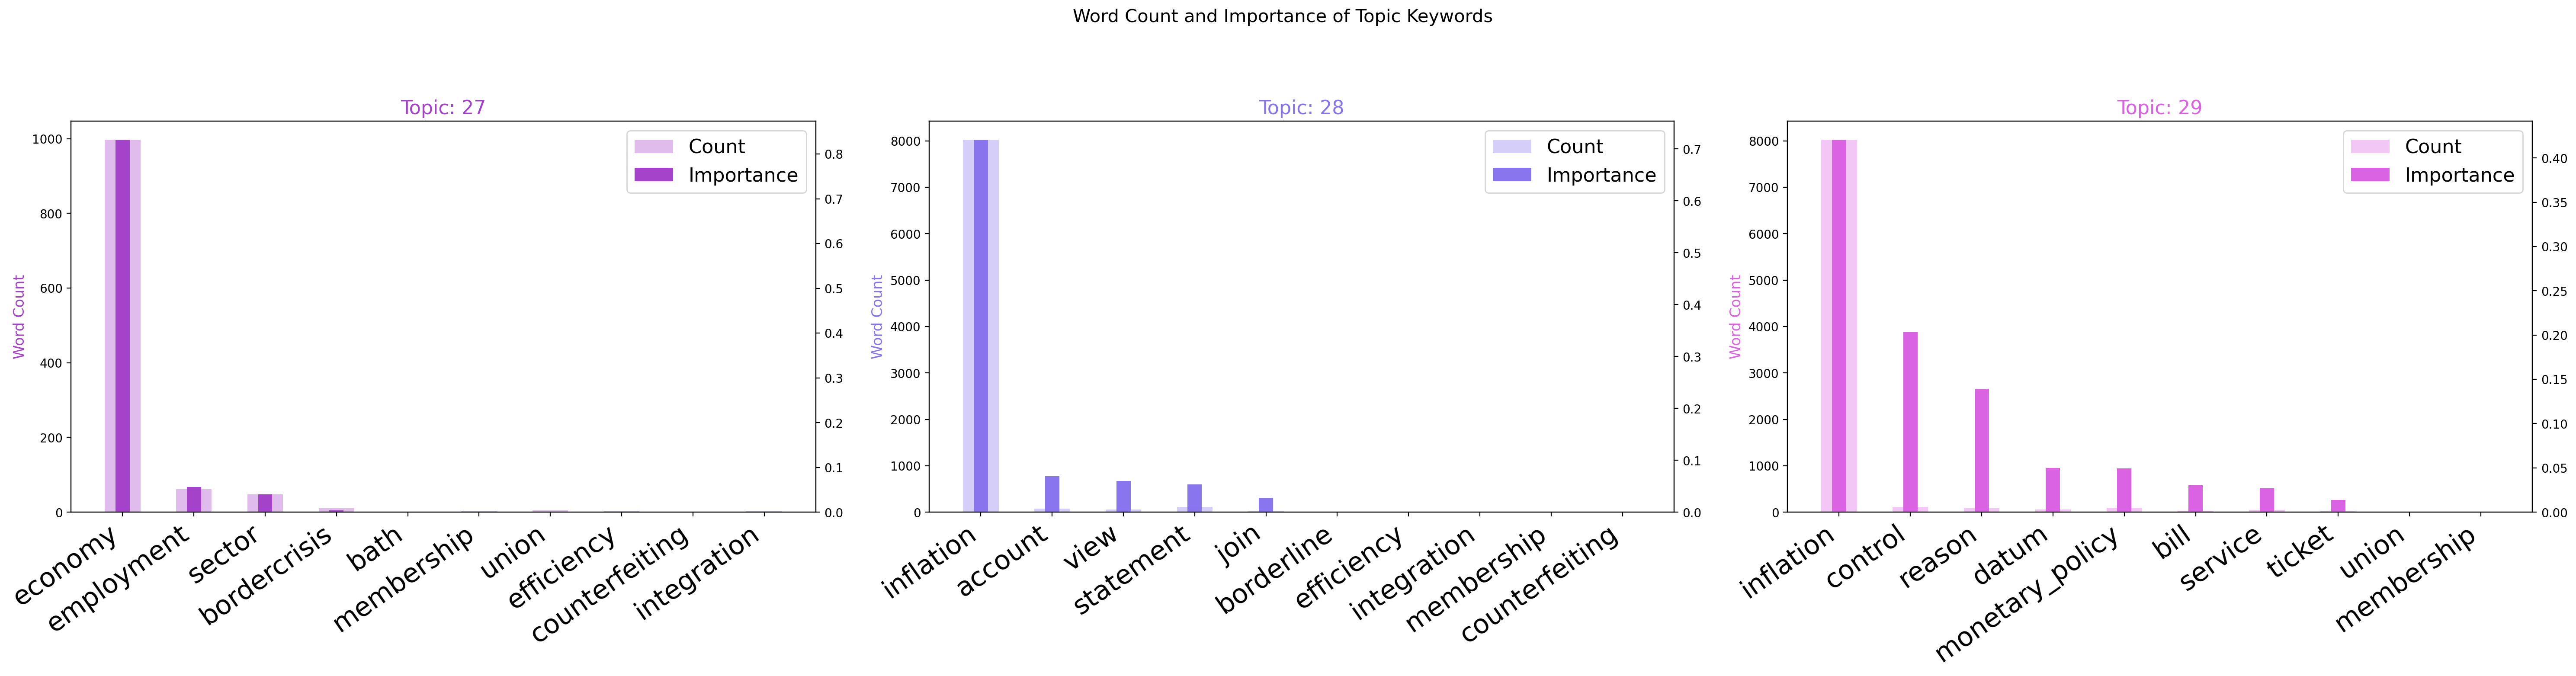

In [305]:
topic_keywords_importance(best_lda, data_for_modeling)

<font size = 4><b><center><a id="section5.3.3">5.3.3 Make hard topic assignments for each tweet</a>

In [168]:
def hard_assignment(document,model,id2word):
    res = {} 

    topic_selection, word_contributions, word_stats = model[document]
    
    main_topic, prop_topic = sorted(topic_selection, key=lambda x: (x[1]), reverse=True)[0]
#     wp = model.show_topic(main_topic) #get topic keywords 
#     all_keywords = ", ".join([word for word, prop in wp]) #all keywords in this topic regardless of whether they appear in this tweet 
    
    topic_keywords = ", ".join([id2word[word_id] for word_id, topics in word_contributions if main_topic in topics])
    
    if topic_keywords == '':
        main_topic = -1
    else:
        main_topic =main_topic
    
    res = {'Dominant_Topic':int(main_topic),
           'Perc_Contribution':round(prop_topic,4),
           'Topic_Keywords':topic_keywords,
#            'Keywords':all_keywords
          }
    return res

In [169]:
%%time
df_res = pd.Series(map(lambda x: hard_assignment(x, best_lda, id2word), corpus)).apply(pd.Series)

Wall time: 14.3 s


In [170]:
df_res['Processed_text'] = [tokens for tokens in data_for_modeling if tokens != []]
df_res

Dominant_Topic  Perc_Contribution      Topic_Keywords  \
0                  10             0.0373           inflation   
1                  10             0.0353           inflation   
2                  16             0.0648               woman   
3                  10             0.0353           inflation   
4                  -1             0.0333                       
...               ...                ...                 ...   
11808              10             0.0353           inflation   
11809              22             0.0628                term   
11810              29             0.0625  inflation, control   
11811              -1             0.0333                       
11812              29             0.0648              reason   

                                          Processed_text  
0      [inflation, complexity, part, cdnecon, inflation]  
1                       [type, infamyau, tag, inflation]  
2                                            [woman, wo]  
3                                            [inflation]  
4                                                 [camp]  
...                                                  ...  
11808  [discipline, work, gbtcbitcoinfor, sell, disci...  
11809  [message, shrink, flation, term, product, infl...  
11810  [game, market, rate, couple, raise_rate, catch...  
11811                                          [printer]  
11812                          [reason, whoscallingshot]  

[11813 rows x 4 columns]

 the dataframe result above, each row belongs to a tweet in the training corpus. The column Dominant_Topic is the topic_id that the LDA model predicted for this tweet and the column Topic_Keywords contains the keywords in the tweet that belong to this tweet's dominant topic.

In [306]:
#hard assignment counts: 
top_topics = df_res.groupby('Dominant_Topic').Perc_Contribution.count().sort_values(ascending=False)


In [309]:
top_topics[1:10]

Dominant_Topic
10    1600
19     756
7      538
18     504
27     437
6      377
22     355
9      349
20     332
Name: Perc_Contribution, dtype: int64

<font size = 4.5><b><center><a id="section5.4">5.4 Sentiment of topic groups</a>

In [183]:
def hard_assignment2(document,model,id2word):
    res = {} 
    
    if document !=[]:

        topic_selection, word_contributions, word_stats = model[document]

        main_topic, prop_topic = sorted(topic_selection, key=lambda x: (x[1]), reverse=True)[0]
        #     wp = model.show_topic(main_topic) #get topic keywords 
        #     all_keywords = ", ".join([word for word, prop in wp]) #all keywords in this topic regardless of whether they appear in this tweet 

        topic_keywords = ", ".join([id2word[word_id] for word_id, topics in word_contributions if main_topic in topics])

        if topic_keywords == '':
            main_topic = -1
        else:
            main_topic =main_topic
        
    else:
        main_topic = np.nan
        prop_topic = np.nan
        topic_keywords = ''
        
    res = {'Dominant_Topic':main_topic,
           'Perc_Contribution':round(prop_topic,4),
           'Topic_Keywords':topic_keywords,
#            'Keywords':all_keywords
          }
    return res

In [184]:
corpus_sentiment = [id2word.doc2bow(doc) for doc in data_for_modeling]
len(corpus_sentiment)

13058

In [185]:
%%time
df_sent = pd.Series(map(lambda x: hard_assignment2(x, best_lda, id2word), corpus_sentiment)).apply(pd.Series)

Wall time: 10.3 s


<font size = 4><b><center><a id="section5.4.1">5.4.1 Time series of top five topic group</a>

In [186]:
df_sent['Processed_text'] = [tokens for tokens in data_for_modeling]
df_sent['text4sentiment'] = [t for t in df_model.text4sentiment.to_list()]
df_sent['Date'] = [date for date in df_model.Date.to_list()]
# df_sent['Vader_Sentiment'] = [sent for sent in df_model.Vader_Sentiment.to_list()]

In [187]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df_sent['Vader_Sentiment'] = df_sent.text4sentiment.apply(lambda x:sid.polarity_scores(x)['compound'])

In [188]:
df_sent_avg = df_sent.groupby(['Dominant_Topic','Date']).mean()
df_sent_avg = df_sent_avg.reset_index()

In [332]:
ls = ['solid', (0,(5,2)), (0,(3,1,1,1,1,1))]

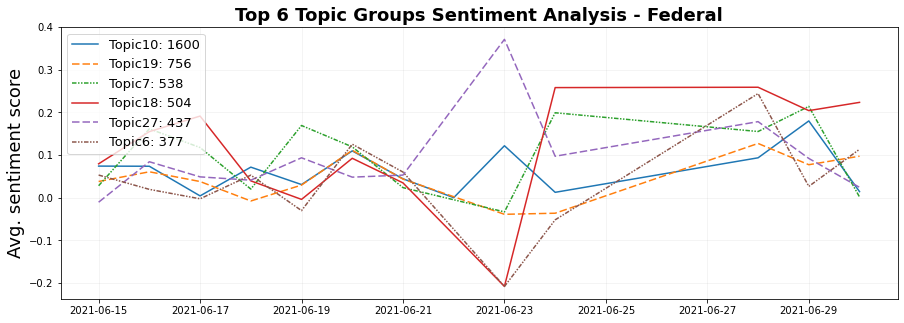

In [347]:
fig, ax = plt.subplots(1,1,figsize = (15,5))
j=0
for i in top_topics.index.to_list()[1:7]: 
    ax.plot(df_sent_avg[(df_sent_avg['Dominant_Topic']==i)]['Date'], 
            df_sent_avg[(df_sent_avg['Dominant_Topic']==i)]['Vader_Sentiment'],'-',
            markersize=2, linestyle = ls[j-3], label='Topic%d: %i'%(i,top_topics[i]))
    j+=1
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Top 6 Topic Groups Sentiment Analysis - Federal'),fontweight ='bold', fontsize = 18)
ax.set_ylabel(('Avg. sentiment score'), fontsize = 18)
ax.legend(prop={'size': 13}, loc='upper left')

fig.savefig("Group_Sentiment_Time_Series", bbox_inches="tight")
plt.show() 

In [352]:
df_model_sa = df_model.groupby(['Date']).mean()
df_model_sa = df_model_sa.reset_index()

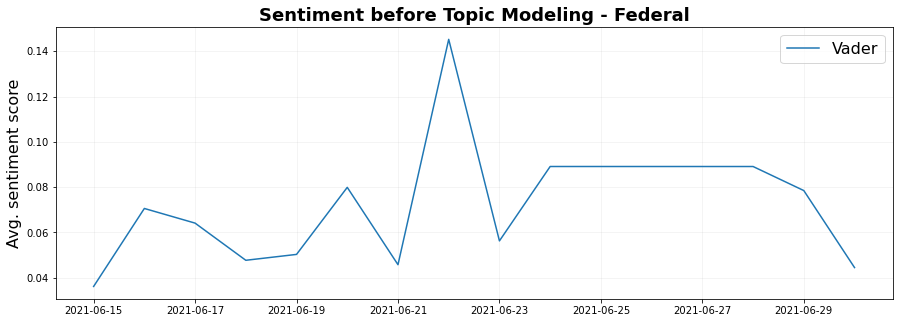

In [359]:
fig, ax = plt.subplots(1,1,figsize = (15,5))

ax.plot(df_model_sa['Date'], df_model_sa['Vader_Sentiment'],'-',markersize=2, label='Vader')
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Sentiment before Topic Modeling - Federal'),fontweight ='bold', fontsize = 18)
ax.set_ylabel(('Avg. sentiment score'), fontsize = 16)
ax.legend(prop={'size': 16},loc='upper right')

fig.savefig("Sentiment_before_Topic_Modeling", bbox_inches="tight")
plt.show() 

Wordcloud of Top N words in top 6 topics

In [196]:
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cols = cols + cols

In [204]:
cloud = WordCloud(background_color = 'white',
                 width =2500,
                 height = 2800,
                 max_words = 10,
                 colormap = 'tab10',
                 color_func = lambda*args, **kwargs:cols[i],
                 prefer_horizontal = 1.0)

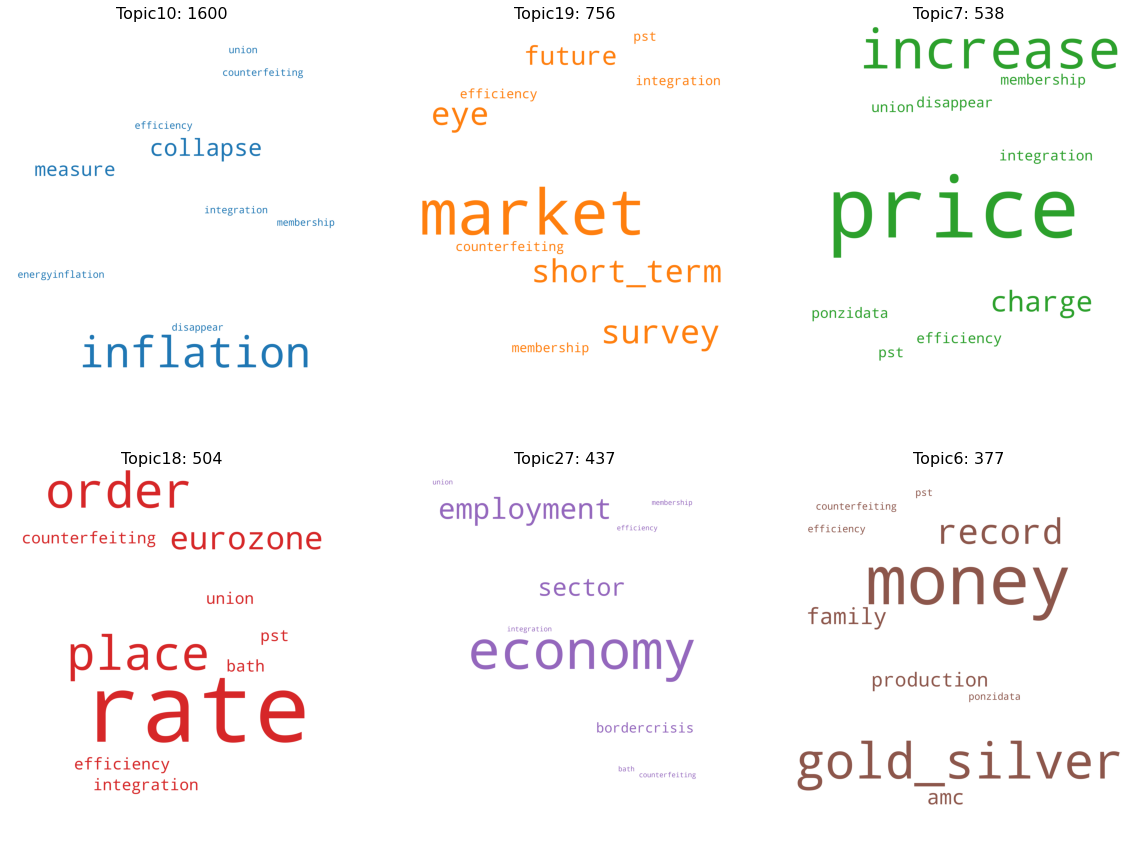

In [362]:
lda_topics = best_lda.show_topics(100, formatted=False)
fig,axes = plt.subplots(2,3, figsize=(20,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_index = top_topics.index.to_list()[i+1]
    topic_words = dict(lda_topics[topic_index][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic%d: %i'%(topic_index,top_topics[topic_index]), fontdict = dict(size=16))
    plt.gca().axis('off')
        
fig.savefig("Best_LDA", bbox_inches="tight")

<font size = 4><b><center><a id="section5.4.2">5.4.2 Averaged sentiment for each topic group</a>

In [194]:
df_sent_avg2 = df_sent.groupby(['Dominant_Topic']).mean()
df_sent_avg2 = df_sent_avg2.reset_index()

In [374]:
# fig, ax = plt.subplots(1,1,figsize = (15,5))

# ax.plot(df_sent_avg2['Dominant_Topic'][1:], 
#         df_sent_avg2['Vader_Sentiment'][1:],'o',markersize=5)
    
# ax.grid(color = 'grey', alpha =0.1)
# ax.set_title(('Groups Sentiment Analysis - Federal'),fontweight ='bold', fontsize = 18)
# ax.set_ylabel(('Avg. sentiment score'), fontsize = 16)
# ax.set_xlabel(('Group'), fontsize = 16)
# # ax.legend(prop={'size': 16},loc='upper right')

# fig.savefig("Sentiment_Time_Series", bbox_inches="tight")
# plt.show() 

In [370]:
#make colors
col =[]
  
for i in range(0, len(df_sent_avg2['Dominant_Topic'])-1):
    if i in top_topics.index.to_list()[1:7]:
        col.append('red')  
    elif i in [11,12,13]:
        col.append('blue')  
    else:
        col.append('black')

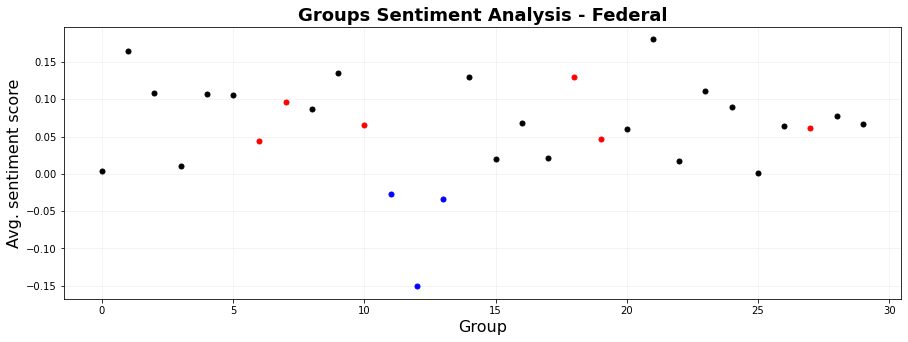

In [371]:
fig, ax = plt.subplots(1,1,figsize = (15,5))

for i in range(len(df_sent_avg2['Dominant_Topic'])-1):
    ax.plot(df_sent_avg2['Dominant_Topic'][i+1], 
            df_sent_avg2['Vader_Sentiment'][i+1],'o', c = col[i] ,markersize=5)
    
ax.grid(color = 'grey', alpha =0.1)
ax.set_title(('Groups Sentiment Analysis - Federal'),fontweight ='bold', fontsize = 18)
ax.set_ylabel(('Avg. sentiment score'), fontsize = 16)
ax.set_xlabel(('Group'), fontsize = 16)
# ax.legend(prop={'size': 16},loc='upper right')

fig.savefig("ALL_Group_Sentiment_Time_Series", bbox_inches="tight")
plt.show() 

<font size = 5><b><center><a id="section6">6. BERT Topic Model</a>

In [237]:
# delete some words that frequently shows but useless according from wordcloud 
# Useless_Words_wc = ['looooooooool','haha']

# data_for_modeling2 = [remove_useless_words(text) for text in data_for_modeling]

In [238]:
# pip install bertopic
#pip install bertopic[visualization]
# pip install sentence-transformers

In [221]:
data_for_BERT = [' '.join(text) for text in data_for_modeling] #data for embedding

In [222]:
from bertopic import BERTopic

<font color='##4682B4' size = 4>  Embeddings models</font> 

The very first step we have to do is converting the documents to numerical data. We use BERT for this purpose as it extracts different embeddings based on the context of the word.

Documentation: https://maartengr.github.io/BERTopic/tutorial/embeddings/embeddings.html

In [383]:
# Sentence-Transformers
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-mpnet-base-v2")
# roberta-base-nli-stsb-mean-tokens
# all-mpnet-base-v2

In [174]:
#Flair
from flair.embeddings import TransformerDocumentEmbeddings
roberta = TransformerDocumentEmbeddings('bert-base-uncased')

In [148]:
# Universal Sentence Encoder (USE)
import tensorflow_hub
embedding_model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

<font color='##4682B4' size = 4>  Clustering</font> 

We want to make sure that documents with similar topics are clustered together such that we can find the topics within these clusters.

Before doing so, we first need to lower the dimensionality of the embeddings as many clustering algorithms handle high dimensionality poorly.

<font color='##4682B4' size = 2 >  UMAP </font> 

Out of the few dimensionality reduction algorithms, UMAP is arguably the best performing as it keeps a significant portion of the high-dimensional local structure in lower dimensionality.

Documentation: https://umap-learn.readthedocs.io/en/latest/index.html#


<font color='##4682B4' size = 2 >  HDBSCAN </font> 

After having reduced the dimensionality of the documents embeddings to 5, we can cluster the documents with HDBSCAN. HDBSCAN is a density-based algorithm that works quite well with UMAP since UMAP maintains a lot of local structure even in lower-dimensional space. Moreover, HDBSCAN does not force data points to clusters as it considers them outliers.

Documentation: https://hdbscan.readthedocs.io/en/latest/index.html

In [224]:
import umap
import hdbscan

In [344]:
%%time
# Define UMAP model to reduce embeddings dimension
umap_model = umap.UMAP(n_neighbors=15,
                       n_components=10,
                       min_dist=0,
                       metric='cosine',
                       low_memory=False,
                       random_state=42)

# Define HDBSCAN model to perform documents clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15,
                                min_samples=1,
                                metric='l2',
                                cluster_selection_method='eom',
                                prediction_data=True)

Wall time: 0 ns


<font color='##4682B4' size = 4>  Applying the BERTopic model</font> 

In [384]:
%%time
warnings.filterwarnings('ignore')
BERT_model = BERTopic(embedding_model= sentence_model,
                      top_n_words=20,
                      nr_topics=31,
                      calculate_probabilities=True,
                      umap_model = umap_model,
                      hdbscan_model = hdbscan_model,
                      verbose=True)

Wall time: 997 µs


In [385]:
# Train model, extract topics and probabilities
BERT_topics, probs = BERT_model.fit_transform(data_for_BERT)

Batches:   0%|          | 0/410 [00:00<?, ?it/s]

2021-11-28 02:42:43,140 - BERTopic - Transformed documents to Embeddings
2021-11-28 02:43:07,667 - BERTopic - Reduced dimensionality with UMAP
2021-11-28 02:43:39,856 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2021-11-28 02:46:29,205 - BERTopic - Reduced number of topics from 211 to 32


<font color='##4682B4' size = 4>  Calculating the coherence score </font> 

In [277]:
#   Preparing the data for calculating the coherence score
def remove_(text):
    text = [w.replace('_','') if '_' in w else w for w in text] #remove underscore    
    return text

In [332]:
def cal_coherence_score(model, texts):
#   texts = [remove_(text) for text in texts]
    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts if text != []]

    # get topics
    topic_list = []
    for j in range(len(model.get_topic_freq())-1):
        topic_list.append([i[0] for i in model.get_topic(j) if i[0]!=''])
        
    # coherence score
    cm = gensim.models.coherencemodel.CoherenceModel(topics=topic_list, texts=texts, 
                                                     corpus=corpus, dictionary=dictionary,
                                                     coherence='c_v')

    coherence_s = cm.get_coherence()
    return coherence_s

In [386]:
%%time
cal_coherence_score(BERT_model, data_for_modeling)

Wall time: 17.6 s


0.5049874556388549

<font size = 4><b><center><a id="section6.1">6.1 Results</a>

<font color='##4682B4' size = 4>  Visualizing the result </font> 

In [387]:
len(BERT_model.get_topic_freq())

32

In [388]:
BERT_model.get_topic_info()[:30]

Topic  Count                                               Name
0      -1   3810                             -1_tax_money_debt_bank
1       0   1935                                    0_lmfao_limit__
2       1    565             1_stagflation_country_eurozone_economy
3       2    526                     2_friend_history_torture_demon
4       3    377      3_dollar_currency_trading_usd_currency_market
5       4    353                        4_taper_hedge_podcast_stock
6       5    345           5_wage_infrastructure_worker_billionaire
7       6    343                          6_link_truth_fact_project
8       7    316  7_federalreserve_monetary_policy_central_bank_...
9       8    304           8_dollar_tree_dollar_store_store_trading
10      9    298       9_debt_debt_ceiling_debt_limit_balance_sheet
11     10    280                   10_oil_gas_electricity_gas_price
12     11    274  11_corruption_government_bordercrisis_american...
13     12    258               12_gold_gold_silver_commodity_silver
14     13    241  13_vote_bidenflation_impeachment_vaccinemandat...
15     14    238                   14_yield_bond_yield_stock_market
16     15    235                     15_spy_scam_fraud_reverse_repo
17     16    218     16_expectation_risk_climate_stress_long_expect
18     17    210                 17_power_regulation_policy_teacher
19     18    208  18_vaccine_expansion_kengriffinlie_citadelscan...
20     19    187           19_food_food_price_grocery_grocery_store
21     20    177        20_supply_chain_supplychain_shortage_supply
22     21    169                        21_arrest_jail_crime_device
23     22    160                 22_investor_stock_equity_portfolio
24     23    159             23_print_money_print_money_print_paper
25     24    149                  24_xglobalmarket_market_amc_crash
26     25    133  25_insider_trading_intention_ban_trading_scand...
27     26    131  26_inflation_bordercrise_afghanistandebacle_mi...
28     27    130                       27_winter_factor_news_bubble
29     28    128                       28_member_head_account_owner

In [427]:
BERT_model.get_topic(31)

False

In [319]:
BERT_model.visualize_topics(width=800)

In [300]:
# import imageio
# img_paths = ['img/111.png', 'img/222.png', 'img/333.png', 'img/444.png', 'img/555.png']
# gif_images = []
# for path in img_paths:
#     gif_images.append(imageio.imread(path))
# imageio.mimsave('Bert_Distance_map.gif', gif_images, fps=0.45)

In [320]:
BERT_model.visualize_barchart(top_n_topics=12, width=1000, height=800)

In [191]:
# BERT_model.visualize_heatmap(width=1000, height=800)

In [272]:
timestamps = df_model.Date.to_list()
topics_over_time = BERT_model.topics_over_time(data_for_BERT, BERT_topics, timestamps)

8it [00:00, 15.82it/s]


In [273]:
BERT_model.visualize_topics_over_time(topics_over_time, topics=list(range(1,10)))

In [274]:
BERT_model.visualize_topics_over_time(topics_over_time, topics=[0])

<font size = 5><b><center><a id="section7">7. Affect Analysis (extra)</a>

In [379]:
from empath import Empath #this is a free alternative to LIWC 

#for filtering on datetimes 
from datetime import datetime, timedelta
import pytz #for managing time zones in datetime objects 
utc=pytz.UTC

In [380]:
lexicon = Empath() #initialize object

In [381]:
liwc_categories = ['positive_emotion','negative_emotion' ,'sadness','anger','achievement','religion','work','home','money','health','sexual','death']

In [382]:
def get_all_empath_categories():
    return list(lexicon.analyze("sample text").keys())

In [383]:
all_categories = get_all_empath_categories()
print(len(all_categories))

194


In [423]:
lexicon.analyze("I love red color", categories=["colors"], tokenizer="default", normalize=False)

{'colors': 0.0}

In [395]:
lexicon.analyze("too expensive", categories=["money"], tokenizer="default", normalize=False)

{'money': 1.0}

In [433]:
def filter_date(df, date_col='created_at', end_time='',duration=''):
    
    ## filter dataframe for the specified time frame 
    if not end_time: #if no date is specified, start from the latest collected tweet 
        end_time = df[date_col].max()

    if not duration: 
        duration = end_time - df[date_col].min() #from the first collected tweet to the end of collection 
        
    #set start time by duration 
    start_time = end_time - duration

    #filter dataframe for time frame 
    df_time_window = df[(df[date_col] >= start_time) & (df[date_col] <= end_time)].copy()
    
    return df_time_window 

def liwc(text, categories=liwc_categories):
    #apply lexicon to each tweet text 
    
    if isinstance(text,str): #if this tweet has any clean_text
        #get emotions counts  
        res = lexicon.analyze(text, categories=categories, tokenizer="default", normalize=False)
        #total word count in this tweet:
        res['word_count'] = len(text.split())
    else:
        res = dict.fromkeys(categories, 0) #dictionary of 0s using all the column names from previous tweet
        res['word_count'] = 0
            
    return res

In [434]:
#with liwc categories 
def get_df_liwc(df, text_col='clean_text', date_col='created_at', end_time='',duration='', categories=liwc_categories):

    #filter dates 
    df_filtered = filter_date(df, date_col=date_col, end_time=end_time, duration=duration)
    
    #apply liwc dictionary to tweets 
    ser_of_dicts = df_filtered[text_col].apply(lambda x: liwc(x,categories=categories)) #returns a series of dictionaries with category:count pairs. 
    #convert the result to dataframe 
    df_liwc = ser_of_dicts.apply(pd.Series) #makes output into a dataframe 
    
    #add datetime as index to new liwc dataframe 
    df_liwc = df_filtered[[date_col]].join(df_liwc) #left join on index 
    df_liwc.set_index(date_col, inplace=True) #make the creation datetime the index 
    df_liwc.sort_index(inplace=True) #sort tweets in ascending date order 
    
    return df_liwc

In [435]:
%%time
df_liwc = get_df_liwc(df,categories=all_categories)

Wall time: 10min 50s


In [436]:
df_liwc.sum(axis=0).sort_values(ascending=False)

word_count      655470.0
economics        32154.0
money            26174.0
business         23835.0
valuable         18932.0
                  ...   
irritability       444.0
exotic             443.0
exasperation       432.0
superhero          420.0
anonymity          190.0
Length: 195, dtype: float64

In [527]:
pd.DataFrame(df_liwc.sum(axis=0).sort_values(ascending=False), columns = ['Count'])[:10]

Count
word_count        655470.0
economics          32154.0
money              26174.0
business           23835.0
valuable           18932.0
negative_emotion   18864.0
payment            18141.0
banking            18048.0
communication      16014.0
shopping           15824.0

In [468]:
def plot_timeseries(df, freq_str='6H', ncol=3, ignore=[], normalize=False): 
    #df is dataframe of word/emotion counts 
    #if normalize is True, the plot is the rolling average of % of each tweet. If False, the plot is a rolling sum of emotional word counts 
    
    ## Bin dataframe by frequency 
    #resampling string id's: 
    # Month, Week, Day, Hour, Minute, Seconds: [#]M, [#]W, [#]D,[#]H,[#]T,[#]S 
    ts = df.resample(freq_str).sum().copy()

    ## Normalize each emotional count by the total word_count 
    if normalize: 
        ts = ts.div(ts.word_count, axis=0) #element-wise divide each column by the total word_count 
    
    ## Remove irrelevant columns 
    #remove word_count from dataframe 
    if 'word_count' not in ignore:
        ignore.append('word_count')
    #remove all irrlevant columns by name 
    for colname in ignore:
        if colname in ts.columns:
            del ts[colname]
    
    ## Rolling 
    if normalize: #if values are normalized by word_count, then plot needs to be rolling average 
        ts = ts.rolling(1).apply(np.mean)
    else: 
        ts = ts.rolling(1).apply(sum)  #rolling() aggregates by ## of records 

    ## Plot 
    ts.plot(figsize=(10,6), alpha =0.9,markersize=1 ) #options: steps, steps-post,  steps-mid, steps-pre
    plt.legend(bbox_to_anchor=(1.0, 1.0), ncol=ncol)
    plt.ylabel('% of word count') if normalize else plt.ylabel('word count')
    plt.show()

In [464]:
#choose the size of the bin. freq_str = Month, Week, Day, Hour, Minute, Seconds: [#]M, [#]W, [#]D,[#]H,[#]T,[#]S 

In [465]:
cat_list = df_liwc.sum(axis=0).sort_values(ascending=False).index[:11].to_list()

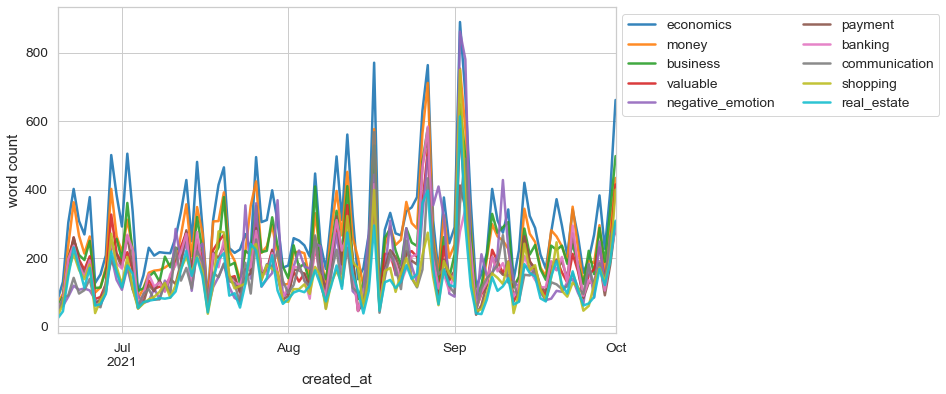

In [469]:
plot_timeseries(df_liwc[cat_list], freq_str='D', ncol=2, ignore=[], normalize=False)

In [ ]:
# # pip install wordninja
# import wordninja
# '_'.join(wordninja.split('climatechange'))